In [1]:
import numpy as np
import pandas as pd

In [ ]:
#讀取檔案
datanew = pd.read_csv('./data/L_data/datanew.csv')
datanew.shape

(1375028, 8)

In [3]:
datanew.describe()

,LocationCode,WindSpeed(m/s),Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW)
count,1.375028e+06,1.375028e+06,1.375028e+06,1.375028e+06,1.375028e+06,1.375028e+06,1.375028e+06
mean,9.173780e+00,3.089870e-01,1.009053e+03,3.064069e+01,7.016948e+01,2.145608e+04,2.488263e+02
std,4.941371e+00,7.524157e-01,6.237628e+00,8.886942e+00,2.509196e+01,2.923070e+04,4.825561e+02
min,1.000000e+00,0.000000e+00,9.581500e+02,2.000000e+00,1.143000e+01,2.000000e+01,0.000000e+00
25%,5.000000e+00,0.000000e+00,1.004500e+03,2.420000e+01,5.009000e+01,2.794170e+03,1.950000e+00
50%,9.000000e+00,0.000000e+00,1.008080e+03,2.949000e+01,7.257000e+01,8.368330e+03,1.722000e+01
75%,1.300000e+01,0.000000e+00,1.013130e+03,3.570000e+01,9.596000e+01,2.621583e+04,1.712400e+02
max,1.700000e+01,1.725000e+01,1.050000e+03,6.180000e+01,1.000000e+02,1.177582e+05,2.626480e+03


In [4]:
#不要datanew中'WindSpeed(m/s)'欄位
datanew.drop(['WindSpeed(m/s)'],axis=1,inplace=True)
datanew.columns

#把datanew創新欄位"Date"，值為DateTime中的日期
datanew['Date'] = pd.to_datetime(datanew['DateTime']).dt.date

#把datanew創新欄位"Month"，值為DateTime中的月份
datanew['Month'] = pd.to_datetime(datanew['DateTime']).dt.month

#把datanew創新欄位"Seson"，值為DateTime中的季節，冬天(12,1,2)、春天(3,4,5)、夏天(6,7,8)、秋天(9,10,11)
datanew['Season'] = datanew['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Autumn')

#把datanew創新欄位"Time"，值為DateTime中的時間
datanew['Time'] = pd.to_datetime(datanew['DateTime']).dt.time

#把datanew創新欄位"Houe"，值為Time中的小時
datanew['Hour'] = pd.to_datetime(datanew['Time'],format='%H:%M:%S').dt.hour

#把datanew創新欄位"Day"，值為Date中的星期幾，星期一(0)、星期二(1)、星期三(2)、星期四(3)、星期五(4)、星期六(5)、星期日(6)
datanew['Day'] = pd.to_datetime(datanew['Date']).dt.dayofweek
datanew.head(3)

,LocationCode,DateTime,Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW),Date,Month,Season,Time,Hour,Day
0,1,2024-01-01 06:31:08.000,1016.50,17.5,86.8,25.00,0.0,2024-01-01,1,Winter,06:31:08,6,0
1,1,2024-01-01 06:32:08.000,1016.53,17.5,86.7,28.33,0.0,2024-01-01,1,Winter,06:32:08,6,0
2,1,2024-01-01 06:33:08.000,1016.57,17.5,86.7,32.50,0.0,2024-01-01,1,Winter,06:33:08,6,0


In [5]:
# 資料整理成字典格式
infor = {
    "LocationCode": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    # "地點名稱": [
    #     "頂樓一號", "頂樓二號", "頂樓三號", "頂樓四號", "頂樓五號", "頂樓六號", "頂樓七號",
    #     "D303", "E303", "一樓一號", "一樓二號", "一樓三號", "管理一號", "管理二號", "美崙一號", "美崙二號", "自家倉庫"
    # ],
    "nearby": ["東華"] * 14 + ["花蓮", "花蓮", "花蓮"],  # 東華為0，花蓮為1
    "Lat": [
        23.5358, 23.5359, 23.5359, 23.5358, 23.5358, 23.5358, 23.5358, 23.5359, 23.5358,
        23.5358, 23.5359, 23.5359, 23.5352, 23.5352, 24.0033, 24.0032, None
    ],
    "Lon": [
        121.3240, 121.3241, 121.3242, 121.3240, 121.3241, 121.3240, 121.3240, 121.3242,
        121.3240, 121.3240, 121.3241, 121.3241, 121.3222, 121.3222, 121.3702, 121.3702, None
    ],
    "degree": [
        181, 175, 180, 161, 208, 208, 172, 219, 151, 223, 131, 298, 249, 197, 127, 82, None
    ],
    "direction": [
        "南", "南", "南", "南", "西南", "西南", "南", "西南", "東南", "西南", "東南", "西北", "西", "南", "東南", "東", None
    ],
    "floor": [
        5, 5, 5, 5, 5, 5, 5, 3, 3, 1, 1, 1, 5, 5, 1, 1, None
    ]
}

# 將資料轉為 DataFrame
df = pd.DataFrame(infor)

print(df)


    LocationCode nearby      Lat       Lon  degree direction  floor
0              1     東華  23.5358  121.3240   181.0         南    5.0
1              2     東華  23.5359  121.3241   175.0         南    5.0
2              3     東華  23.5359  121.3242   180.0         南    5.0
3              4     東華  23.5358  121.3240   161.0         南    5.0
4              5     東華  23.5358  121.3241   208.0        西南    5.0
5              6     東華  23.5358  121.3240   208.0        西南    5.0
6              7     東華  23.5358  121.3240   172.0         南    5.0
7              8     東華  23.5359  121.3242   219.0        西南    3.0
8              9     東華  23.5358  121.3240   151.0        東南    3.0
9             10     東華  23.5358  121.3240   223.0        西南    1.0
10            11     東華  23.5359  121.3241   131.0        東南    1.0
11            12     東華  23.5359  121.3241   298.0        西北    1.0
12            13     東華  23.5352  121.3222   249.0         西    5.0
13            14     東華  23.5352  121.3222   197

In [6]:
#把datanew和df合併，依照datanew中的LocationCode，將df中的資料合併到datanew中
datanew = pd.merge(datanew,df,on='LocationCode',how='left')
datanew.head(3)

datanew.to_csv('./analysis_data.csv',index=False)

/tmp/ipykernel_3023407/3653502668.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datanew['Power(mW)'])


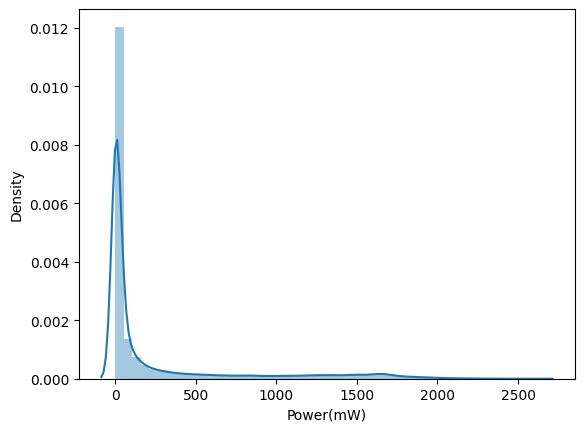

In [7]:
#看datanew中Power(mW)的分布
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(datanew['Power(mW)'])
plt.show()

In [8]:
#計算datanew中Power的outlier
Q1 = datanew['Power(mW)'].quantile(0.25)
Q3 = datanew['Power(mW)'].quantile(0.75)
IQR = Q3 - Q1

outliers = datanew[(datanew['Power(mW)'] < (Q1 - 1.5 * IQR)) | (datanew['Power(mW)'] > (Q3 + 1.5 * IQR))]
outliers.shape

(245555, 19)

/tmp/ipykernel_3023407/124523650.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outliers['Power(mW)'])


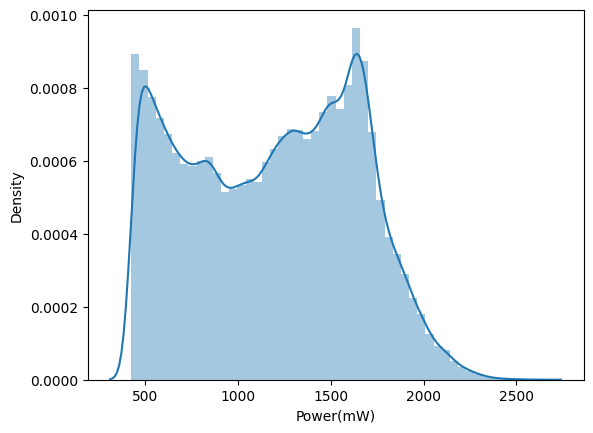

In [9]:
#看outliers中Power(mW)的分布
sns.distplot(outliers['Power(mW)'])
plt.show()

In [10]:
#看outliers中Power(mW)的最小值、最大值、平均值、標準差
outliers['Power(mW)'].describe()

count    245555.000000
mean       1184.196336
std         455.957499
min         425.200000
25%         774.655000
50%        1215.850000
75%        1570.780000
max        2626.480000
Name: Power(mW), dtype: float64

不同Month和Power有沒有差別

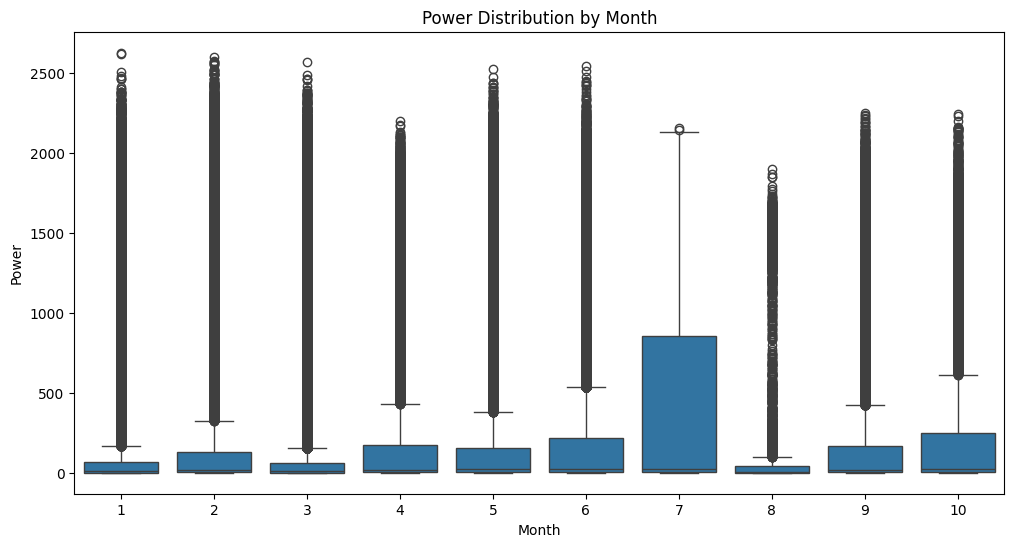

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#boxplot
sns.boxplot(x='Month', y='Power(mW)', data=datanew)

plt.title('Power Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Power')
plt.show()


In [12]:
#使用 Shapiro-Wilk 檢定檢查數據分布是否符合常態分布
from scipy.stats import shapiro

for month in datanew['Month'].unique():
    stat, p = shapiro(datanew[datanew['Month'] == month]['Power(mW)'])
    print(f"Month {month}: W={stat:.3f}, p-value={p:.3f}")


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 60079.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 114802.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 240356.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 174795.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-pa

Month 1: W=0.440, p-value=0.000
Month 2: W=0.532, p-value=0.000
Month 3: W=0.467, p-value=0.000
Month 4: W=0.577, p-value=0.000
Month 5: W=0.551, p-value=0.000
Month 6: W=0.602, p-value=0.000
Month 7: W=0.714, p-value=0.000
Month 9: W=0.582, p-value=0.000
Month 10: W=0.630, p-value=0.000
Month 8: W=0.463, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 195011.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 50353.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 33781.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9446.
  res = hypotest_fun_out(*samples, **kwds)


In [13]:
#使用 Levene 檢定檢查var是否相等
from scipy.stats import levene

stat, p = levene(*[datanew[datanew['Month'] == month]['Power(mW)'] for month in datanew['Month'].unique()])
print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")

Levene Test: W=3769.146, p-value=0.000


p-value < 0.05，該月份的數據不符合常態分布。
p-value < 0.05，則不同月份的數據var不齊。

若數據符合常態分布且var同，使用(ANOVA)。
若不符合，則使用非參數檢定，如 Kruskal-Wallis 檢定。

In [14]:
from scipy.stats import kruskal

stat, p = kruskal(*[datanew[datanew['Month'] == month]['Power(mW)'] for month in datanew['Month'].unique()])
print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")


Kruskal-Wallis Test: H=16140.626, p-value=0.000


p-value < 0.05，表示月份對 Power 有顯著影響，可以進一步進行多重比較 (Dunn's Test (Dunn 檢定)) 來找出差異的月份組合。

               1              2              3              4              5   \
1    1.000000e+00  5.134770e-244   3.300005e-05   0.000000e+00   0.000000e+00   
2   5.134770e-244   1.000000e+00   0.000000e+00   7.728769e-07   9.272036e-11   
3    3.300005e-05   0.000000e+00   1.000000e+00   0.000000e+00   0.000000e+00   
4    0.000000e+00   7.728769e-07   0.000000e+00   1.000000e+00   1.000000e+00   
5    0.000000e+00   9.272036e-11   0.000000e+00   1.000000e+00   1.000000e+00   
6    0.000000e+00   2.406363e-38   0.000000e+00   3.529386e-15   1.980570e-14   
7    0.000000e+00   0.000000e+00   0.000000e+00  4.857805e-305   0.000000e+00   
8    3.996327e-12  4.985330e-120   4.944848e-07  4.271009e-145  2.096183e-151   
9   4.671893e-151   1.000000e+00  5.634244e-299   4.315827e-08   7.306777e-11   
10  1.959636e-297   3.575194e-39   0.000000e+00   2.307676e-23   3.942597e-22   

               6              7              8              9              10  
1    0.000000e+00   0.000000

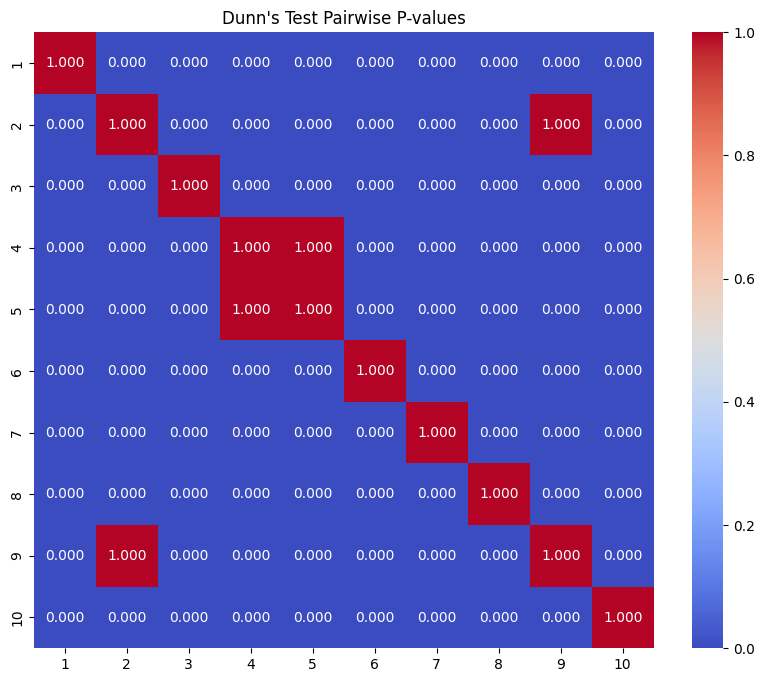

In [15]:
from scikit_posthocs import posthoc_dunn

# Dunn's Test，方法選擇 p 值校正
dunn_results = posthoc_dunn(datanew, val_col='Power(mW)', group_col='Month', p_adjust='bonferroni')
print(dunn_results)

import seaborn as sns
import matplotlib.pyplot as plt

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values")
plt.show()

每個單元格表示兩個月份組之間的 p 值。如果某個 p 值小於顯著性水平 (如 0.05)，表示這兩個月份的數據有顯著差異。
4、5月份沒有顯著差異
2、9月份沒有顯著差異

所以可分成
第一組(1)，第二組(2、9)，第三組(3)，第四組(4、5)，第五組(6)、第六組(7)、第八組(8)

不同Season和Power有沒有差別

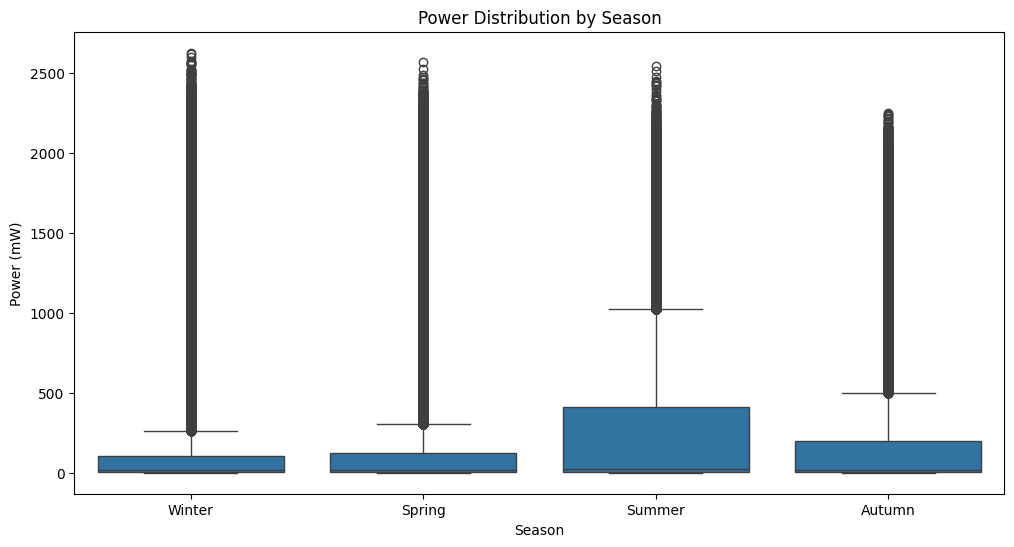

In [16]:
# Season 和 Power 的關係
plt.figure(figsize=(12, 6))
sns.boxplot(x='Season', y='Power(mW)', data=datanew)
plt.title('Power Distribution by Season')
plt.xlabel('Season')
plt.ylabel('Power (mW)')
plt.show()

In [17]:
from scipy.stats import shapiro, levene

# Shapiro-Wilk 檢定：檢查每個 Season 的 Power(mW) 是否符合常態分布
for season in datanew['Season'].unique():
    stat, p = shapiro(datanew[datanew['Season'] == season]['Power(mW)'])
    print(f"Season {season}: W={stat:.3f}, p-value={p:.3f}")

# Levene 檢定：檢查各個 Season 的 Power(mW) 方差是否齊性
stat, p = levene(*[datanew[datanew['Season'] == season]['Power(mW)'] for season in datanew['Season'].unique()])
print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 174881.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 684391.
  res = hypotest_fun_out(*samples, **kwds)


Season Winter: W=0.503, p-value=0.000
Season Spring: W=0.529, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 431622.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 84134.
  res = hypotest_fun_out(*samples, **kwds)


Season Summer: W=0.657, p-value=0.000
Season Autumn: W=0.602, p-value=0.000
Levene Test: W=5467.916, p-value=0.000


p-value < 0.05，數據不符合常態分布且var不同，使用非參數檢定，如 Kruskal-Wallis 檢定。

In [18]:
from scipy.stats import kruskal

# Kruskal-Wallis 檢定：檢查不同 Season 的 Power(mW) 是否有顯著差異
stat, p = kruskal(*[datanew[datanew['Season'] == season]['Power(mW)'] for season in datanew['Season'].unique()])
print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")


Kruskal-Wallis Test: H=5590.046, p-value=0.000



p-value < 0.05，表示季節對 Power 有顯著影響，可以進一步進行多重比較 (Dunn's Test (Dunn 檢定)) 來找出差異的季節組合。

               Autumn         Spring        Summer        Winter
Autumn   1.000000e+00  3.947214e-104  6.888984e-52  1.870678e-91
Spring  3.947214e-104   1.000000e+00  0.000000e+00  1.514036e-01
Summer   6.888984e-52   0.000000e+00  1.000000e+00  0.000000e+00
Winter   1.870678e-91   1.514036e-01  0.000000e+00  1.000000e+00


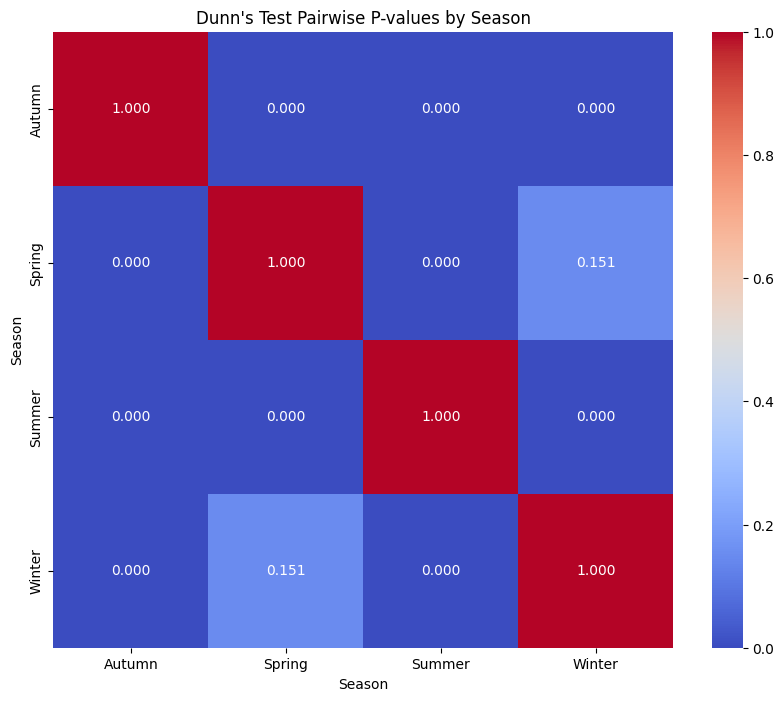

In [19]:
from scikit_posthocs import posthoc_dunn
import seaborn as sns
import matplotlib.pyplot as plt

# Dunn's Test，方法選擇 p 值校正
dunn_results = posthoc_dunn(datanew, val_col='Power(mW)', group_col='Season', p_adjust='bonferroni')

# 顯示結果矩陣
print(dunn_results)

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values by Season")
plt.xlabel("Season")
plt.ylabel("Season")
plt.show()


每個單元格表示兩個月份組之間的 p 值。如果某個 p 值小於顯著性水平 (如 0.05)，表示這兩個季節的數據有顯著差異。
spring、winter沒有顯著差異

所以可分成:第一組(spring、winter)，第二組(summer)，第三組(autumn)

不同Hour和Power有沒有差別

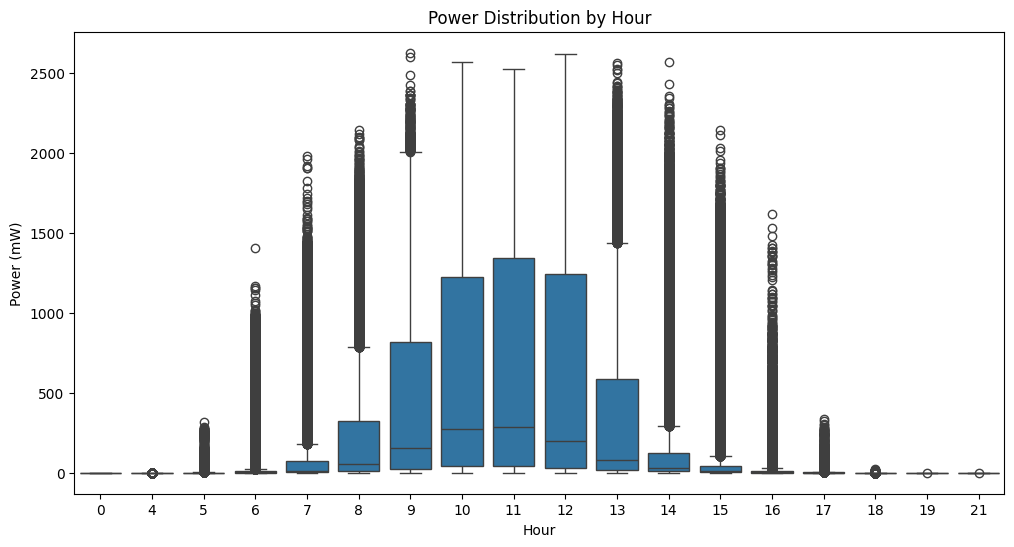

In [20]:
# Hour 和 Power 的關係
plt.figure(figsize=(12, 6))
sns.boxplot(x='Hour', y='Power(mW)', data=datanew)
plt.title('Power Distribution by Hour')
plt.xlabel('Hour')
plt.ylabel('Power (mW)')
plt.show()

In [21]:
from scipy.stats import shapiro, levene

# Shapiro-Wilk 檢定：檢查每個 Hour 的 Power(mW) 是否符合常態分布
for hour in datanew['Hour'].unique():
    hour_data = datanew[datanew['Hour'] == hour]['Power(mW)']
    
    # 檢查數據量是否足夠
    if len(hour_data) >= 3:
        stat, p = shapiro(hour_data)
        print(f"Hour {hour}: W={stat:.3f}, p-value={p:.3f}")
    else:
        print(f"Hour {hour}: Not enough data (n={len(hour_data)}) for Shapiro-Wilk test.")

# Levene 檢定：檢查各個 Hour 的 Power(mW) 方差是否齊性
hour_groups = [datanew[datanew['Hour'] == hour]['Power(mW)'] for hour in datanew['Hour'].unique() if len(datanew[datanew['Hour'] == hour]) >= 3]

if len(hour_groups) > 1:  # Levene 檢定需要至少兩組數據
    stat, p = levene(*hour_groups)
    print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")
else:
    print("Not enough groups with sufficient data for Levene test.")



/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 110250.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 115249.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 114590.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 101010.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-p

Hour 6: W=0.268, p-value=0.000
Hour 7: W=0.518, p-value=0.000
Hour 8: W=0.690, p-value=0.000
Hour 9: W=0.794, p-value=0.000
Hour 10: W=0.826, p-value=0.000
Hour 11: W=0.819, p-value=0.000
Hour 12: W=0.794, p-value=0.000
Hour 13: W=0.703, p-value=0.000
Hour 14: W=0.534, p-value=0.000
Hour 15: W=0.369, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 103307.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 101256.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 49412.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 70019.
  res = hypotest_fun_out(*samples, **kwds)


Hour 16: W=0.242, p-value=0.000
Hour 17: W=0.199, p-value=0.000
Hour 18: W=0.295, p-value=0.000
Hour 5: W=0.080, p-value=0.000
Hour 4: W=0.468, p-value=0.000
Hour 19: W=0.198, p-value=0.000
Hour 21: W=0.630, p-value=0.001
Hour 0: Not enough data (n=2) for Shapiro-Wilk test.
Levene Test: W=31094.486, p-value=0.000


p-value < 0.05，數據不符合常態分布且var不同，使用非參數檢定，如 Kruskal-Wallis 檢定。

In [22]:
from scipy.stats import kruskal

# Kruskal-Wallis 檢定：檢查不同 Hour 的 Power(mW) 是否有顯著差異
stat, p = kruskal(*[datanew[datanew['Hour'] == hour]['Power(mW)'] for hour in datanew['Hour'].unique()])
print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")



Kruskal-Wallis Test: H=759406.659, p-value=0.000


p-value < 0.05，表示Hour對 Power 有顯著影響，可以進一步進行多重比較 (Dunn's Test (Dunn 檢定)) 來找出差異的Hour組合。

          0              4              5              6             7   \
0   1.000000   1.000000e+00   1.000000e+00   1.000000e+00  1.000000e+00   
4   1.000000   1.000000e+00   1.943314e-65   0.000000e+00  0.000000e+00   
5   1.000000   1.943314e-65   1.000000e+00   0.000000e+00  0.000000e+00   
6   1.000000   0.000000e+00   0.000000e+00   1.000000e+00  0.000000e+00   
7   1.000000   0.000000e+00   0.000000e+00   0.000000e+00  1.000000e+00   
8   0.546618   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
9   0.137521   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
10  0.056697   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
11  0.050012   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
12  0.078432   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
13  0.228982   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
14  0.941893   0.000000e+00   0.000000e+00   0.000000e+00  0.000000e+00   
15  1.000000   0.000000e+

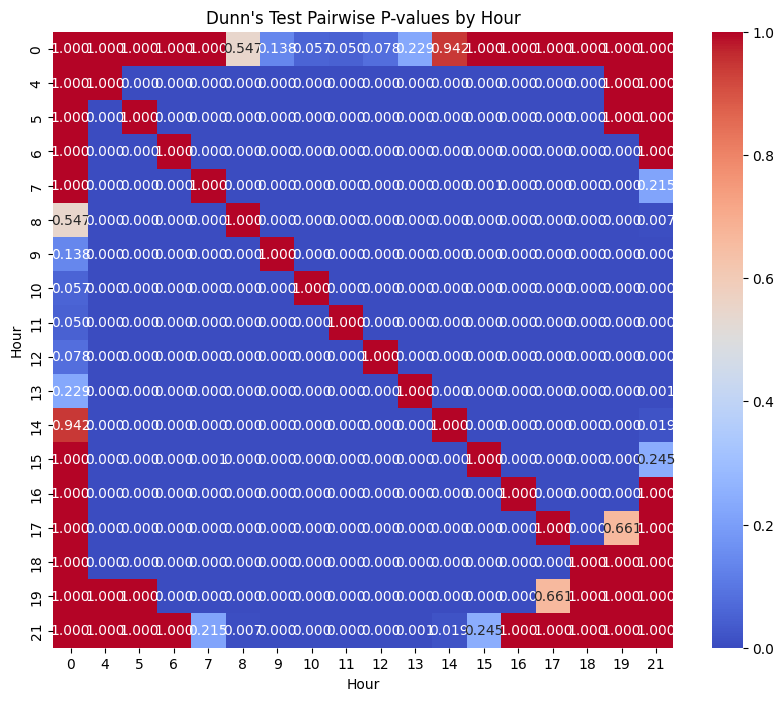

In [23]:
from scikit_posthocs import posthoc_dunn
import seaborn as sns
import matplotlib.pyplot as plt

# Dunn's Test，方法選擇 p 值校正
dunn_results = posthoc_dunn(datanew, val_col='Power(mW)', group_col='Hour', p_adjust='bonferroni')

# 顯示結果矩陣
print(dunn_results)

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values by Hour")
plt.xlabel("Hour")
plt.ylabel("Hour")
plt.show()

7-17小時之間皆有顯著差異，表示可以每個Hour自己一組

不同Day和Power有沒有差別

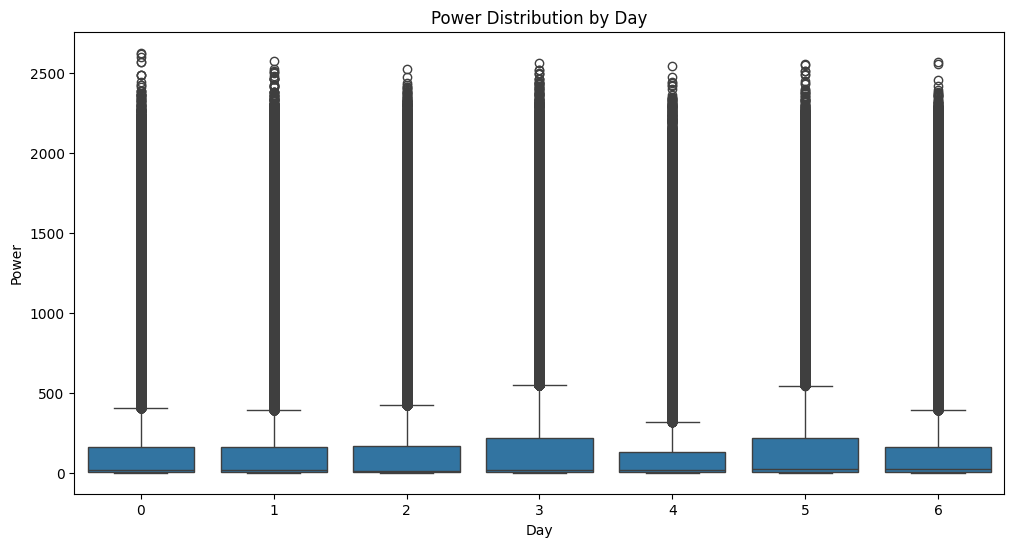

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#boxplot
sns.boxplot(x='Day', y='Power(mW)', data=datanew)

plt.title('Power Distribution by Day')
plt.xlabel('Day')
plt.ylabel('Power')
plt.show()

In [25]:
from scipy.stats import shapiro, levene

# 使用 Shapiro-Wilk 檢定檢查每個 Day 的 Power(mW) 是否符合常態分布
print("Shapiro-Wilk Test for Normality by Day:")
for day in datanew['Day'].unique():
    day_data = datanew[datanew['Day'] == day]['Power(mW)']
    if len(day_data) >= 3:  # Shapiro 檢定需要至少 3 個數據
        stat, p = shapiro(day_data)
        print(f"Day {day}: W={stat:.3f}, p-value={p:.3f}")
    else:
        print(f"Day {day}: Not enough data (n={len(day_data)}) for Shapiro-Wilk test.")

# 使用 Levene 檢定檢查每個 Day 的 Power(mW) 方差是否相等
print("\nLevene Test for Equal Variances by Day:")
day_groups = [datanew[datanew['Day'] == day]['Power(mW)'] for day in datanew['Day'].unique() if len(datanew[datanew['Day'] == day]) >= 3]

if len(day_groups) > 1:  # Levene 檢定需要至少兩組數據
    stat, p = levene(*day_groups)
    print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")
else:
    print("Not enough groups with sufficient data for Levene test.")


Shapiro-Wilk Test for Normality by Day:
Day 0: W=0.570, p-value=0.000
Day 1: W=0.565, p-value=0.000
Day 2: W=0.577, p-value=0.000
Day 3: W=0.598, p-value=0.000
Day 4: W=0.548, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 189489.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 193873.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 198550.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 205260.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-p

Day 5: W=0.606, p-value=0.000
Day 6: W=0.567, p-value=0.000

Levene Test for Equal Variances by Day:


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 188840.
  res = hypotest_fun_out(*samples, **kwds)


Levene Test: W=355.005, p-value=0.000


p-value < 0.05，該月份的數據不符合常態分布。
p-value < 0.05，則不同月份的數據var不齊。

若數據符合常態分布且var同，使用(ANOVA)。
若不符合，則使用非參數檢定，如 Kruskal-Wallis 檢定。

In [26]:
from scipy.stats import kruskal

# Kruskal-Wallis 檢定：檢查不同 Day 的 Power(mW) 是否有顯著差異
stat, p = kruskal(*[datanew[datanew['Day'] == day]['Power(mW)'] for day in datanew['Day'].unique()])
print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")


Kruskal-Wallis Test: H=2761.033, p-value=0.000


p-value < 0.05，表示星期對 Power 有顯著影響，可以進一步進行多重比較 (Dunn's Test (Dunn 檢定)) 來找出差異的星期組合。

Dunn's Test Pairwise P-values:
               0              1              2              3              4  \
0   1.000000e+00   1.000000e+00   1.206905e-72   1.202196e-06   7.802633e-39   
1   1.000000e+00   1.000000e+00   4.202667e-60   9.596097e-12   1.112263e-29   
2   1.206905e-72   4.202667e-60   1.000000e+00  1.539018e-126   1.298783e-05   
3   1.202196e-06   9.596097e-12  1.539018e-126   1.000000e+00   2.220214e-79   
4   7.802633e-39   1.112263e-29   1.298783e-05   2.220214e-79   1.000000e+00   
5  7.245511e-133  3.583812e-154   0.000000e+00   1.273746e-84   0.000000e+00   
6   5.475231e-49   1.353811e-61  2.465526e-241   2.667193e-21  2.390084e-175   

               5              6  
0  7.245511e-133   5.475231e-49  
1  3.583812e-154   1.353811e-61  
2   0.000000e+00  2.465526e-241  
3   1.273746e-84   2.667193e-21  
4   0.000000e+00  2.390084e-175  
5   1.000000e+00   4.205752e-20  
6   4.205752e-20   1.000000e+00  


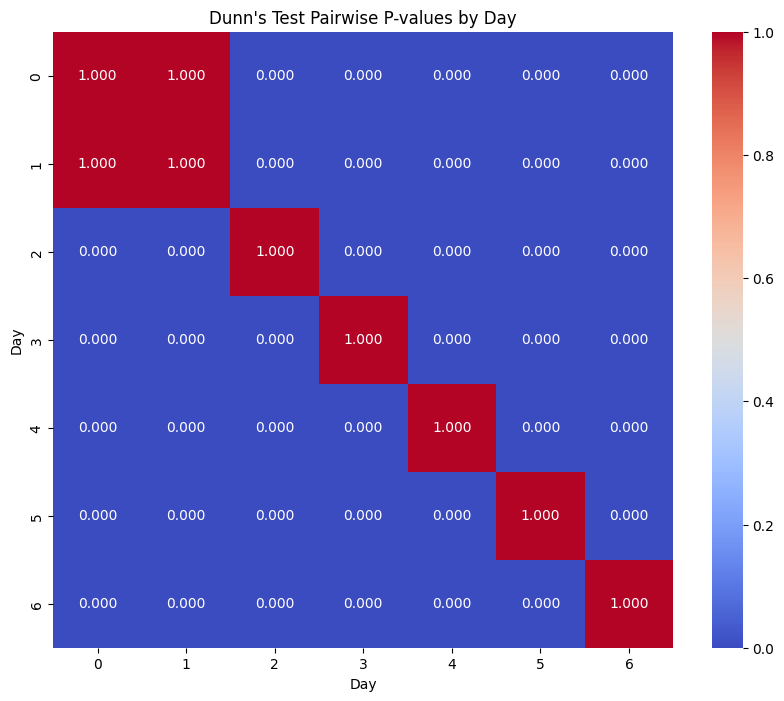

In [27]:
from scikit_posthocs import posthoc_dunn
import seaborn as sns
import matplotlib.pyplot as plt

# Dunn's Test，方法選擇 p 值校正
dunn_results = posthoc_dunn(datanew, val_col='Power(mW)', group_col='Day', p_adjust='bonferroni')

# 顯示結果矩陣
print("Dunn's Test Pairwise P-values:")
print(dunn_results)

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values by Day")
plt.xlabel("Day")
plt.ylabel("Day")
plt.show()


星期一和星期二之間有顯著差異，但星期幾和發電量、天氣應該沒有關係? 感覺先不用這變項。

不同nearby和Power有沒有差別

/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33775 (\N{CJK UNIFIED IDEOGRAPH-83EF}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 33457 (\N{CJK UNIFIED IDEOGRAPH-82B1}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 34030 (\N{CJK UNIFIED IDEOGRAPH-84EE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


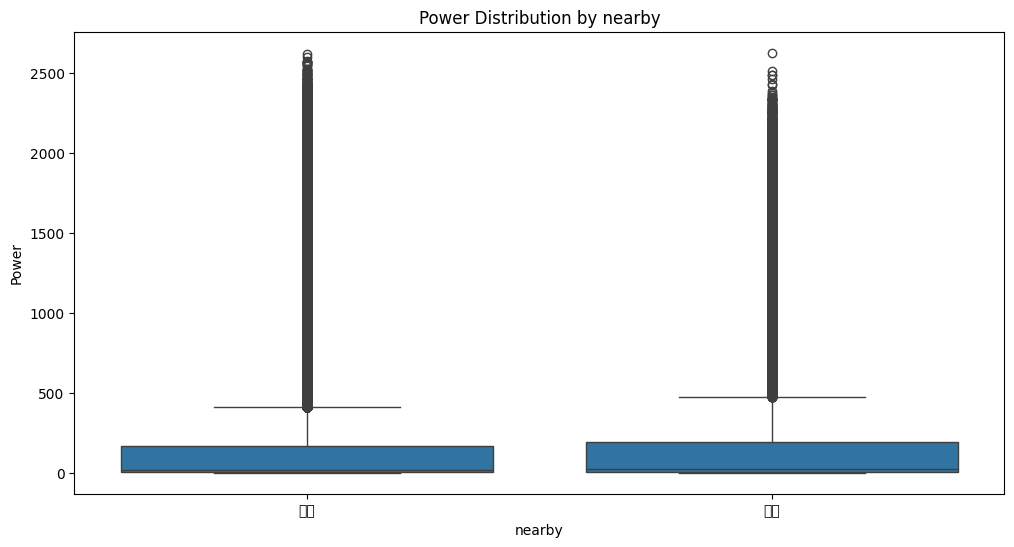

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#boxplot
sns.boxplot(x='nearby', y='Power(mW)', data=datanew)

plt.title('Power Distribution by nearby')
plt.xlabel('nearby')
plt.ylabel('Power')
plt.show()

In [29]:
from scipy.stats import shapiro

for group in datanew['nearby'].unique():
    stat, p = shapiro(datanew[datanew['nearby'] == group]['Power(mW)'])
    print(f"Nearby Group {group}: W={stat:.3f}, p-value={p:.3f}")

from scipy.stats import levene

group1 = datanew[datanew['nearby'] == datanew['nearby'].unique()[0]]['Power(mW)']
group2 = datanew[datanew['nearby'] == datanew['nearby'].unique()[1]]['Power(mW)']

stat, p = levene(group1, group2)
print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 1109888.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 265140.
  res = hypotest_fun_out(*samples, **kwds)


Nearby Group 東華: W=0.572, p-value=0.000
Nearby Group 花蓮: W=0.592, p-value=0.000
Levene Test: W=337.351, p-value=0.000


若符合常態分布且var齊：使用獨立樣本 t 檢定。
若不符合常態分布或var不齊：使用 Mann-Whitney U 檢定（非參數檢定）。

In [30]:
from scipy.stats import mannwhitneyu

stat, p = mannwhitneyu(group1, group2, alternative='two-sided')
print(f"Mann-Whitney U Test: U={stat:.3f}, p-value={p:.3f}")


Mann-Whitney U Test: U=141593188113.500, p-value=0.000


p-value < 0.05：兩組之間的 Power 存在顯著差異。

不同direction和Power有沒有差別

/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


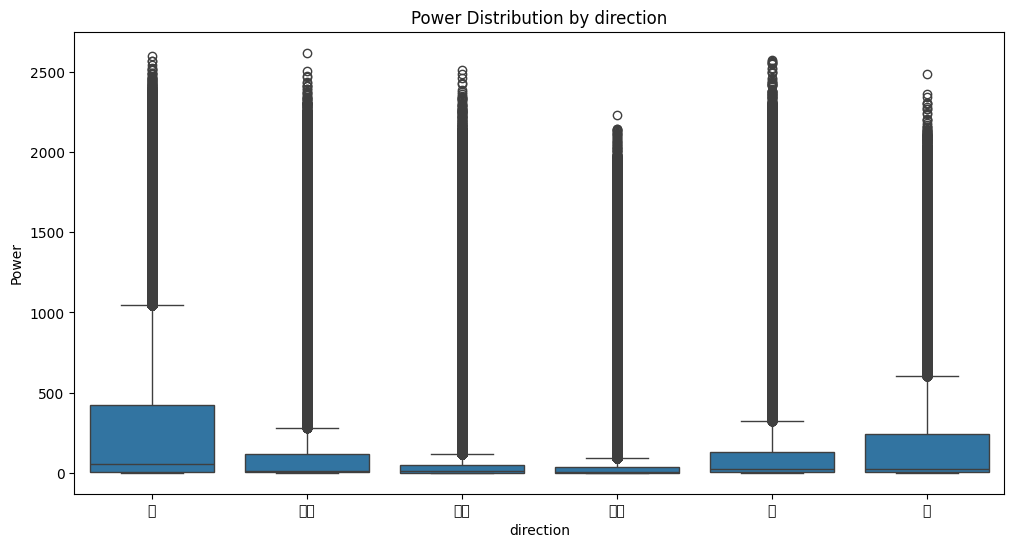

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

#boxplot
sns.boxplot(x='direction', y='Power(mW)', data=datanew)

plt.title('Power Distribution by direction')
plt.xlabel('direction')
plt.ylabel('Power')
plt.show()

In [32]:
from scipy.stats import shapiro, levene

# 使用 Shapiro-Wilk 檢定檢查每個 direction 的 Power(mW) 是否符合常態分布
print("Shapiro-Wilk Test for Normality by Direction:")
for direction in datanew['direction'].unique():
    direction_data = datanew[datanew['direction'] == direction]['Power(mW)']
    if len(direction_data) >= 3:  # Shapiro 檢定需要至少 3 個數據
        stat, p = shapiro(direction_data)
        print(f"Direction {direction}: W={stat:.3f}, p-value={p:.3f}")
    else:
        print(f"Direction {direction}: Not enough data (n={len(direction_data)}) for Shapiro-Wilk test.")

# 使用 Levene 檢定檢查每個 direction 的 Power(mW) 方差是否相等
print("\nLevene Test for Equal Variances by Direction:")
direction_groups = [datanew[datanew['direction'] == direction]['Power(mW)'] for direction in datanew['direction'].unique() if len(datanew[datanew['direction'] == direction]) >= 3]

if len(direction_groups) > 1:  # 確保有至少兩組數據
    stat, p = levene(*direction_groups)
    print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")
else:
    print("Not enough groups with sufficient data for Levene test.")


Shapiro-Wilk Test for Normality by Direction:
Direction 南: W=0.681, p-value=0.000
Direction 西南: W=0.531, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 436234.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 349086.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 243519.
  res = hypotest_fun_out(*samples, **kwds)


Direction 東南: W=0.454, p-value=0.000
Direction 西北: W=0.403, p-value=0.000
Direction 西: W=0.529, p-value=0.000
Direction 東: W=0.608, p-value=0.000
Direction None: Not enough data (n=0) for Shapiro-Wilk test.

Levene Test for Equal Variances by Direction:


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 96783.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 69506.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 83258.
  res = hypotest_fun_out(*samples, **kwds)


Levene Test: W=5040.389, p-value=0.000


p-value < 0.05，該數據不符合常態分布。
p-value < 0.05，則不同數據var不齊。

若數據符合常態分布且var同，使用(ANOVA)。
若不符合，則使用非參數檢定，如 Kruskal-Wallis 檢定。

In [33]:
from scipy.stats import kruskal

# 過濾掉 Power(mW) 或 direction 中含 NaN 的數據
direction_groups = [datanew[(datanew['direction'] == direction) & (datanew['Power(mW)'].notna())]['Power(mW)'] for direction in datanew['direction'].unique()]

# 確保每組中至少有數據
direction_groups = [group for group in direction_groups if len(group) > 0]

if len(direction_groups) > 1:  # 確保有至少兩組數據進行檢定
    stat, p = kruskal(*direction_groups)
    print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")
else:
    print("Not enough groups with sufficient data for Kruskal-Wallis test.")



Kruskal-Wallis Test: H=57934.795, p-value=0.000


p-value < 0.05，表示direction對 Power 有顯著影響，可以進一步進行多重比較 (Dunn's Test (Dunn 檢定)) 來找出差異的direction組合。

Dunn's Test Pairwise P-values:
      南             東             東南              西             西北  \
南   1.0  0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
東   0.0  1.000000e+00   0.000000e+00   9.335464e-31   0.000000e+00   
東南  0.0  0.000000e+00   1.000000e+00   0.000000e+00  7.529409e-111   
西   0.0  9.335464e-31   0.000000e+00   1.000000e+00   0.000000e+00   
西北  0.0  0.000000e+00  7.529409e-111   0.000000e+00   1.000000e+00   
西南  0.0  0.000000e+00   0.000000e+00  1.958556e-145   0.000000e+00   

               西南  
南    0.000000e+00  
東    0.000000e+00  
東南   0.000000e+00  
西   1.958556e-145  
西北   0.000000e+00  
西南   1.000000e+00  


/home/r12855011/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/r12855011/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 26481 (\N{CJK UNIFIED IDEOGRAPH-6771}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/r12855011/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 35199 (\N{CJK UNIFIED IDEOGRAPH-897F}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/r12855011/.local/lib/python3.10/site-packages/seaborn/utils.py:61: UserWarning: Glyph 21271 (\N{CJK UNIFIED IDEOGRAPH-5317}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
/home/r12855011/.local/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/home/r12855011/.local/lib/python3.10/site

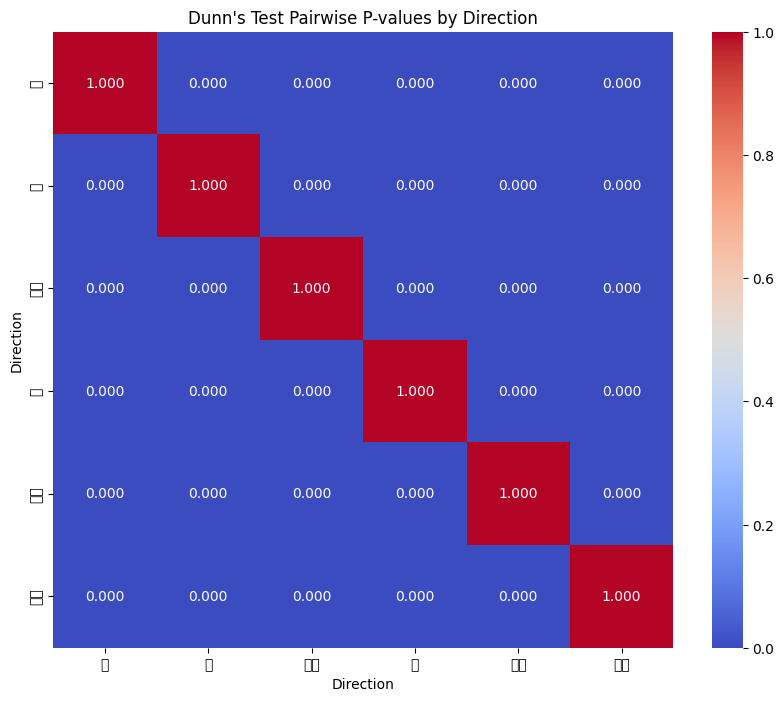

In [34]:
from scikit_posthocs import posthoc_dunn
import seaborn as sns
import matplotlib.pyplot as plt

datanew_clean = datanew.dropna(subset=['Power(mW)', 'direction'])

# 使用清理後的數據進行 Dunn 檢定
dunn_results = posthoc_dunn(datanew_clean, val_col='Power(mW)', group_col='direction', p_adjust='bonferroni')

# 顯示結果矩陣
print("Dunn's Test Pairwise P-values:")
print(dunn_results)

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values by Direction")
plt.xlabel("Direction")
plt.ylabel("Direction")
plt.show()



每個direction皆顯著不同，可以自己一組

不同floor和Power有沒有差別

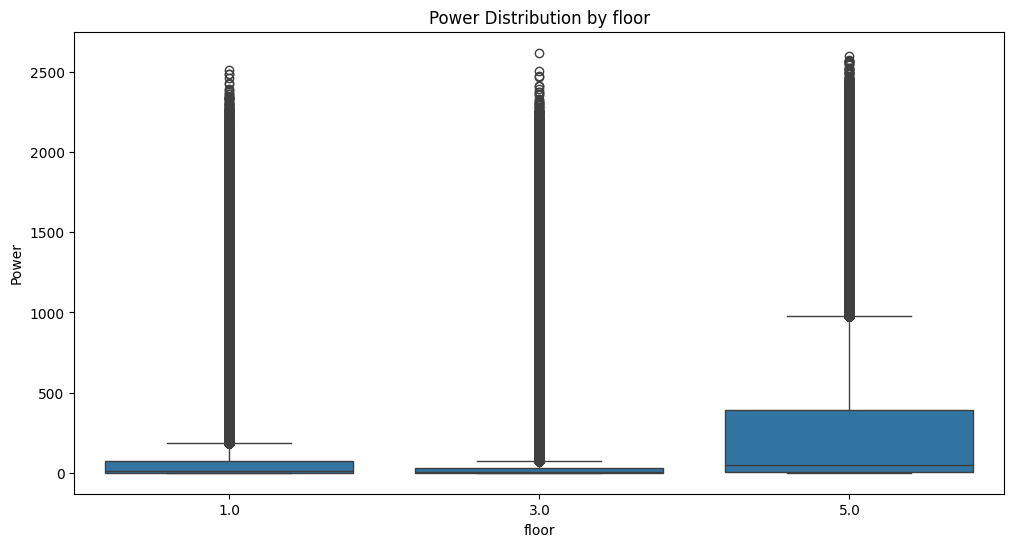

In [ ]:
plt.figure(figsize=(12, 6))

#boxplot
sns.boxplot(x='floor', y='Power(mW)', data=datanew)

plt.title('Power Distribution by floor')
plt.xlabel('floor')
plt.ylabel('Power')
plt.show()

In [36]:
# 使用 Shapiro-Wilk 檢定檢查每個 floor 的 Power(mW) 是否符合常態分布
print("Shapiro-Wilk Test for Normality by Floor:")
for floor in datanew['floor'].unique():
    floor_data = datanew[datanew['floor'] == floor]['Power(mW)']
    if len(floor_data) >= 3:  # Shapiro 檢定需要至少 3 個數據
        stat, p = shapiro(floor_data)
        print(f"Floor {floor}: W={stat:.3f}, p-value={p:.3f}")
    else:
        print(f"Floor {floor}: Not enough data (n={len(floor_data)}) for Shapiro-Wilk test.")

# 使用 Levene 檢定檢查每個 floor 的 Power(mW) 方差是否相等
print("\nLevene Test for Equal Variances by Floor:")
floor_groups = [datanew[datanew['floor'] == floor]['Power(mW)'] for floor in datanew['floor'].unique() if len(datanew[datanew['floor'] == floor]) >= 3]

if len(floor_groups) > 1:  # 確保有至少兩組數據
    stat, p = levene(*floor_groups)
    print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")
else:
    print("Not enough groups with sufficient data for Levene test.")


Shapiro-Wilk Test for Normality by Floor:
Floor 5.0: W=0.672, p-value=0.000
Floor 3.0: W=0.396, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 613456.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 240981.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 423949.
  res = hypotest_fun_out(*samples, **kwds)


Floor 1.0: W=0.490, p-value=0.000
Floor nan: Not enough data (n=0) for Shapiro-Wilk test.

Levene Test for Equal Variances by Floor:
Levene Test: W=15918.484, p-value=0.000


p-value < 0.05，該月份的數據不符合常態分布。
p-value < 0.05，則不同月份的數據var不齊。

若數據符合常態分布且var同，使用(ANOVA)。
若不符合，則使用非參數檢定，如 Kruskal-Wallis 檢定。

In [37]:

# 過濾掉 Power(mW) 或 floor 中含 NaN 的數據
floor_groups = [datanew[(datanew['floor'] == floor) & (datanew['Power(mW)'].notna())]['Power(mW)'] for floor in datanew['floor'].unique()]

# 確保每組中至少有數據
floor_groups = [group for group in floor_groups if len(group) > 0]

if len(floor_groups) > 1:  # 確保有至少兩組數據進行檢定
    stat, p = kruskal(*floor_groups)
    print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")
else:
    print("Not enough groups with sufficient data for Kruskal-Wallis test.")


Kruskal-Wallis Test: H=76799.854, p-value=0.000


p-value < 0.05，表示floor對 Power 有顯著影響，可以進一步進行多重比較 (Dunn's Test (Dunn 檢定)) 來找出差異的floor組合。

Dunn's Test Pairwise P-values:
     1.0  3.0  5.0
1.0  1.0  0.0  0.0
3.0  0.0  1.0  0.0
5.0  0.0  0.0  1.0


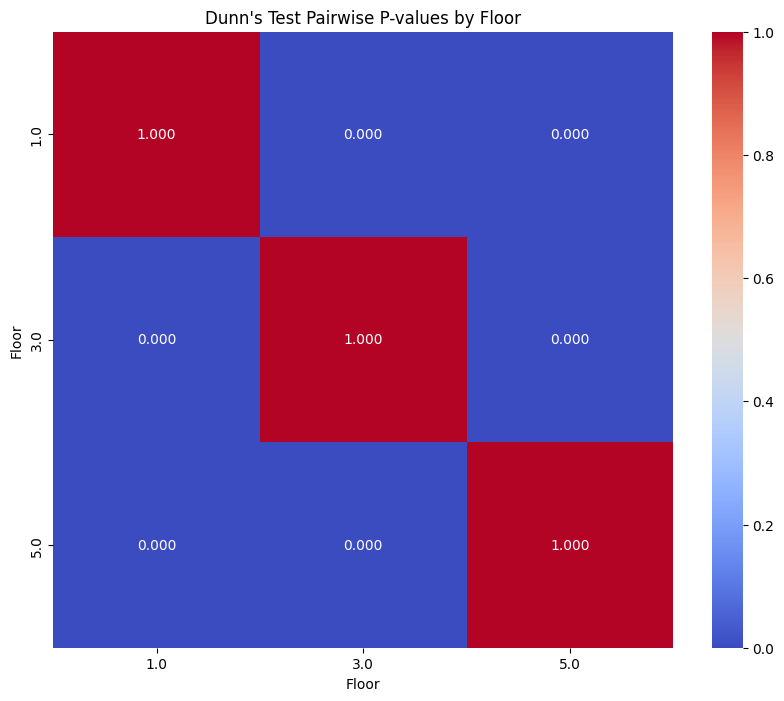

In [38]:

# 移除包含 NaN 的數據
datanew_clean = datanew.dropna(subset=['Power(mW)', 'floor'])

# 使用清理後的數據進行 Dunn 檢定
dunn_results = posthoc_dunn(datanew_clean, val_col='Power(mW)', group_col='floor', p_adjust='bonferroni')

# 顯示結果矩陣
print("Dunn's Test Pairwise P-values:")
print(dunn_results)

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values by Floor")
plt.xlabel("Floor")
plt.ylabel("Floor")
plt.show()


每個floor自己一組

不同LocationCode和Power有沒有差別

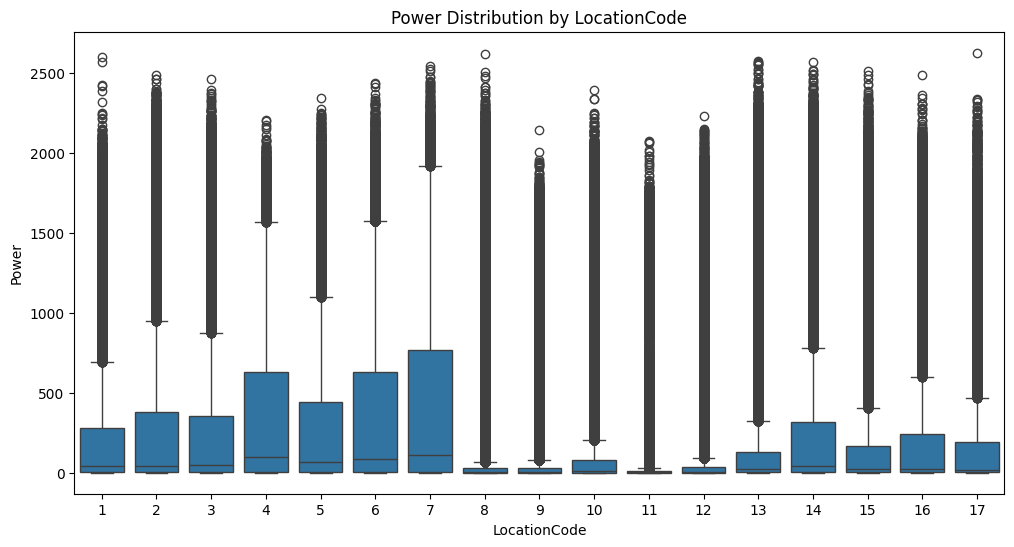

In [39]:

plt.figure(figsize=(12, 6))
#boxplot
sns.boxplot(x='LocationCode', y='Power(mW)', data=datanew)
plt.title('Power Distribution by LocationCode')
plt.xlabel('LocationCode')
plt.ylabel('Power')
plt.show()

In [40]:

print("Shapiro-Wilk Test for Normality by LocationCode:")
for location in datanew['LocationCode'].unique():
    stat, p = shapiro(datanew[datanew['LocationCode'] == location]['Power(mW)'])
    print(f"Location {location}: W={stat:.3f}, p-value={p:.3f}")

from scipy.stats import levene

# 提取每個地點的 Power(mW) 數據
location_groups = [datanew[datanew['LocationCode'] == location]['Power(mW)'] for location in datanew['LocationCode'].unique()]

# Levene 檢定
stat, p = levene(*location_groups)
print(f"Levene Test: W={stat:.3f}, p-value={p:.3f}")


Shapiro-Wilk Test for Normality by LocationCode:
Location 1: W=0.635, p-value=0.000
Location 2: W=0.659, p-value=0.000
Location 3: W=0.651, p-value=0.000
Location 4: W=0.757, p-value=0.000
Location 5: W=0.687, p-value=0.000
Location 6: W=0.720, p-value=0.000
Location 7: W=0.748, p-value=0.000
Location 8: W=0.370, p-value=0.000
Location 9: W=0.428, p-value=0.000
Location 10: W=0.485, p-value=0.000
Location 11: W=0.253, p-value=0.000
Location 12: W=0.403, p-value=0.000
Location 13: W=0.529, p-value=0.000
Location 14: W=0.641, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 101673.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 89335.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 55380.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 68940.
  res = hypotest_fun_out(*samples, **kwds)
/home/r12855011/.local/lib/python3.10/site-pack

Location 15: W=0.563, p-value=0.000
Location 16: W=0.608, p-value=0.000
Location 17: W=0.607, p-value=0.000
Levene Test: W=3505.364, p-value=0.000


/home/r12855011/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 96642.
  res = hypotest_fun_out(*samples, **kwds)


In [ ]:

# Kruskal-Wallis 檢定
stat, p = kruskal(*location_groups)
print(f"Kruskal-Wallis Test: H={stat:.3f}, p-value={p:.3f}")


Kruskal-Wallis Test: H=109547.846, p-value=0.000


Dunn's Test Pairwise P-values:
               1              2              3              4              5   \
1    1.000000e+00   4.378109e-12   6.192402e-43   0.000000e+00  1.814429e-100   
2    4.378109e-12   1.000000e+00   3.338270e-11  9.433369e-202   5.406259e-46   
3    6.192402e-43   3.338270e-11   1.000000e+00   5.689378e-88   8.421760e-09   
4    0.000000e+00  9.433369e-202   5.689378e-88   1.000000e+00   9.150930e-38   
5   1.814429e-100   5.406259e-46   8.421760e-09   9.150930e-38   1.000000e+00   
6   1.065337e-289  3.373554e-187   8.857553e-87   1.000000e+00   1.647182e-39   
7    0.000000e+00  1.380384e-245  4.627504e-122   1.377103e-04   7.424927e-64   
8    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
9    0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
10   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
11   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00 

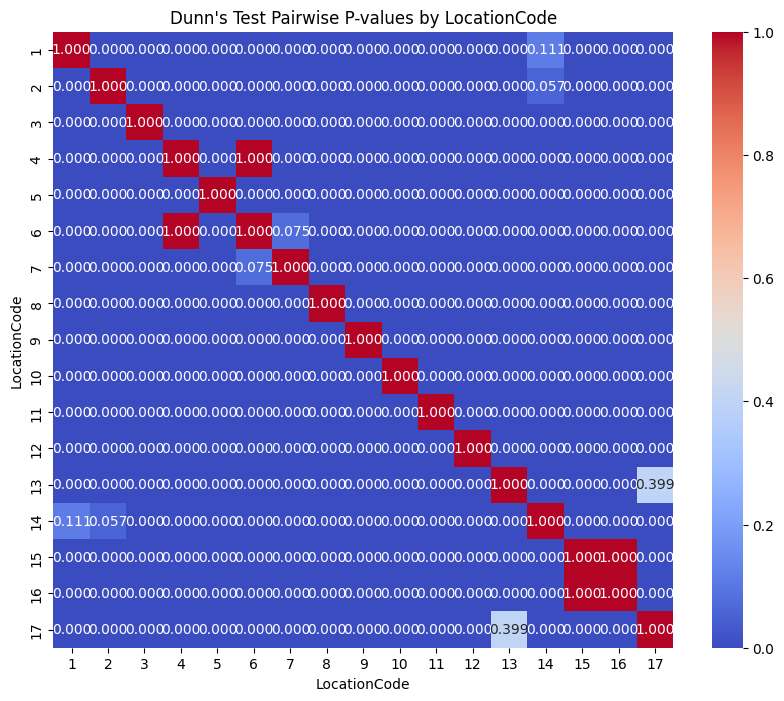

In [42]:

# Dunn's Test，方法選擇 p 值校正
dunn_results = posthoc_dunn(datanew, val_col='Power(mW)', group_col='LocationCode', p_adjust='bonferroni')

# 顯示結果矩陣
print("Dunn's Test Pairwise P-values:")
print(dunn_results)

# Dunn 檢定結果熱圖
plt.figure(figsize=(10, 8))
sns.heatmap(dunn_results, annot=True, fmt=".3f", cmap="coolwarm", cbar=True)
plt.title("Dunn's Test Pairwise P-values by LocationCode")
plt.xlabel("LocationCode")
plt.ylabel("LocationCode")
plt.show()


if 要分地點做模型，4、6可一起，6、7可一起，1、14可一起，2、14可一起，13、17可一起，15、16可一起

不同Lon, Lat和Power有沒有差別

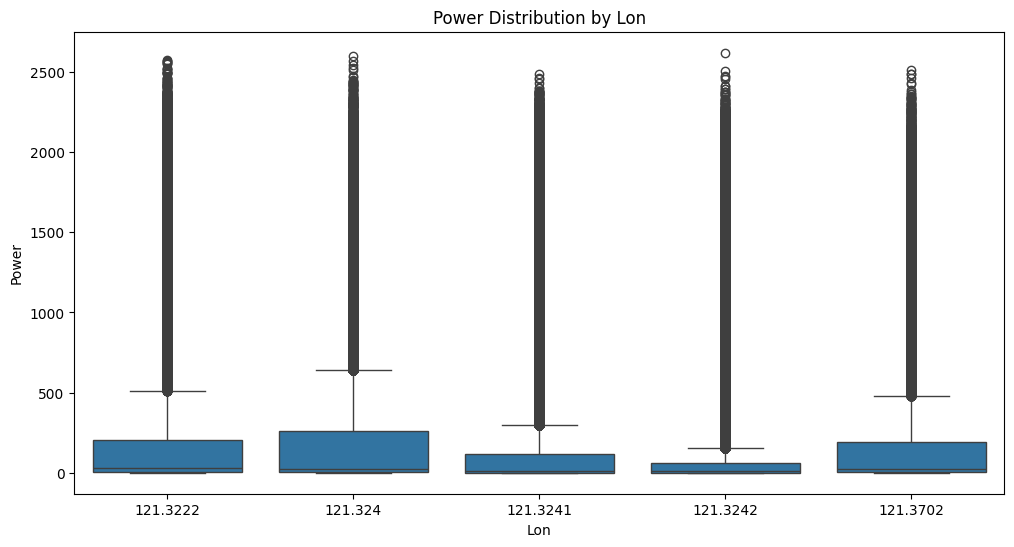

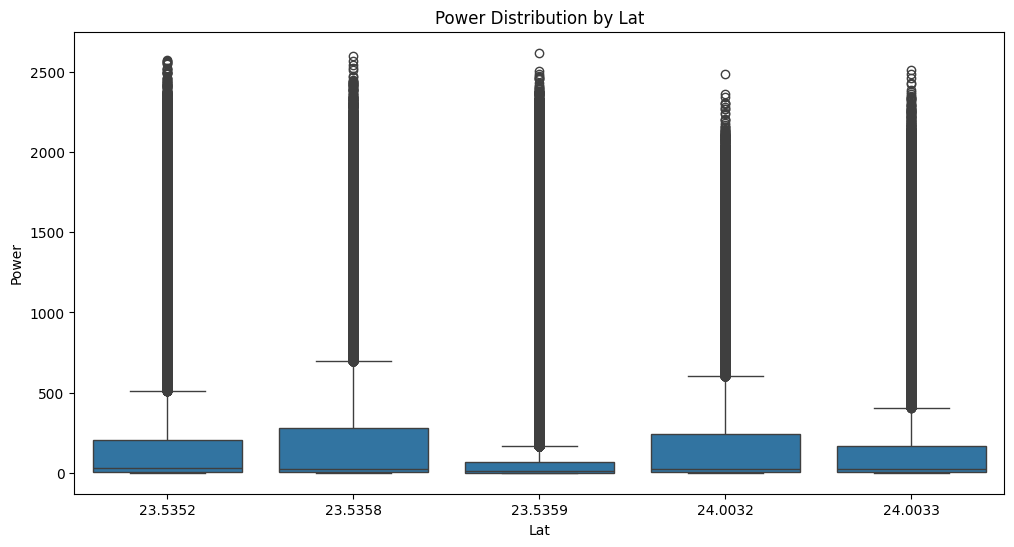

In [43]:

plt.figure(figsize=(12, 6))
#boxplot
sns.boxplot(x='Lon', y='Power(mW)', data=datanew)
plt.title('Power Distribution by Lon')
plt.xlabel('Lon')
plt.ylabel('Power')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Lat', y='Power(mW)', data=datanew)
plt.title('Power Distribution by Lat')
plt.xlabel('Lat')
plt.ylabel('Power')
plt.show()

直接使用經緯度數值，特徵數少，保留空間信息。

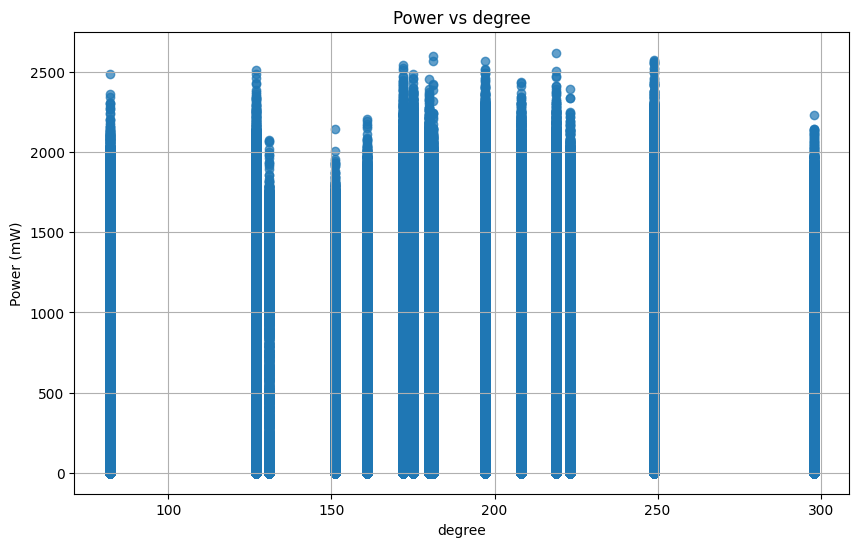

In [44]:

plt.figure(figsize=(10, 6))
plt.scatter(datanew['degree'], datanew['Power(mW)'], alpha=0.7)
plt.title('Power vs degree')
plt.xlabel('degree')
plt.ylabel('Power (mW)')
plt.grid(True)
plt.show()


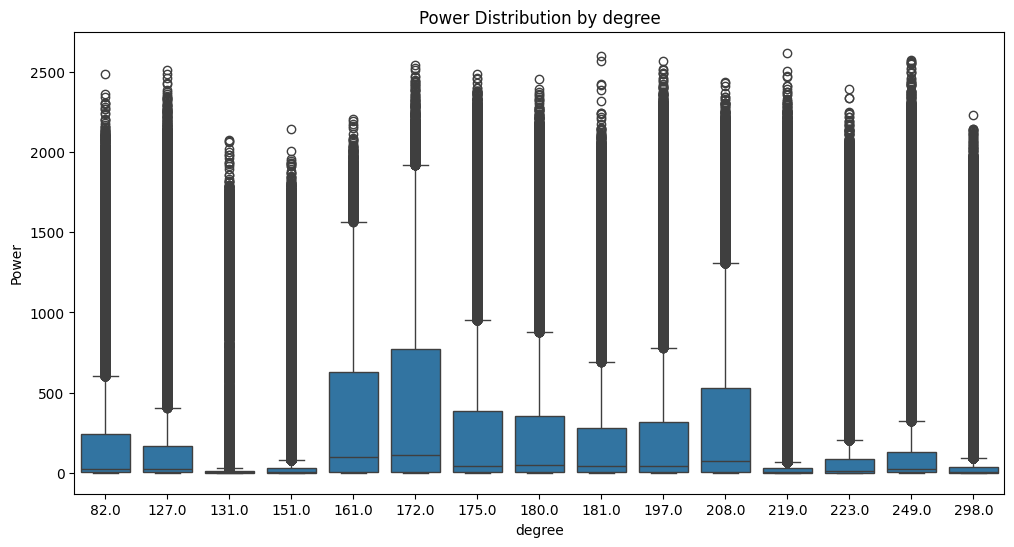

In [45]:

plt.figure(figsize=(12, 6))
#boxplot
sns.boxplot(x='degree', y='Power(mW)', data=datanew)
plt.title('Power Distribution by degree')
plt.xlabel('degree')
plt.ylabel('Power')
plt.show()


In [46]:
import pandas as pd
from scipy.stats import pearsonr, spearmanr

# 移除包含 NaN 的行
datanew_clean = datanew.dropna(subset=['degree', 'Power(mW)'])

# 確認清理後的數據
print(f"Number of rows after cleaning: {len(datanew_clean)}")

# 計算 Pearson 相關係數（線性相關）
pearson_corr, pearson_p = pearsonr(datanew_clean['degree'], datanew_clean['Power(mW)'])
print(f"Pearson Correlation: r={pearson_corr:.3f}, p-value={pearson_p:.3f}")

# 計算 Spearman 相關係數（非線性單調相關）
spearman_corr, spearman_p = spearmanr(datanew_clean['degree'], datanew_clean['Power(mW)'])
print(f"Spearman Correlation: r={spearman_corr:.3f}, p-value={spearman_p:.3f}")



Number of rows after cleaning: 1278386
Pearson Correlation: r=-0.055, p-value=0.000
Spearman Correlation: r=-0.061, p-value=0.000


In [ ]:
aaaa

在樣本量極大的情況下，即使相關係數數值較小，也可能出現顯著的 p-value（接近 0）。因此，僅僅依靠 p-value 判斷相關性並不充分，需要結合相關係數的大小進行解釋。

統整

In [50]:

# 資料整理成字典格式
infor_after = {
    "LocationCode": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
    # "地點名稱": [
    #     "頂樓一號", "頂樓二號", "頂樓三號", "頂樓四號", "頂樓五號", "頂樓六號", "頂樓七號",
    #     "D303", "E303", "一樓一號", "一樓二號", "一樓三號", "管理一號", "管理二號", "美崙一號", "美崙二號", "自家倉庫"
    # ],
    "nearby": [0] * 14 + [1,1,1],  # 東華為0，花蓮為1
    "Lat": [
        23.5358, 23.5359, 23.5359, 23.5358, 23.5358, 23.5358, 23.5358, 23.5359, 23.5358,
        23.5358, 23.5359, 23.5359, 23.5352, 23.5352, 24.0033, 24.0032, 23.5352
    ],
    "Lon": [
        121.3240, 121.3241, 121.3242, 121.3240, 121.3241, 121.3240, 121.3240, 121.3242,
        121.3240, 121.3240, 121.3241, 121.3241, 121.3222, 121.3222, 121.3702, 121.3702, 121.3222
    ],
    # "degree": [
    #     181, 175, 180, 161, 208, 208, 172, 219, 151, 223, 131, 298, 249, 197, 127, 82, None
    # ],
    "direction": [
        "南", "南", "南", "南", "西南", "西南", "南", "西南", "東南", "西南", "東南", "西北", "西", "南", "東南", "東", "西"
    ],
    "floor": [
        5, 5, 5, 5, 5, 5, 5, 3, 3, 1, 1, 1, 5, 5, 1, 1, 5
    ]
}

# 將資料轉為 DataFrame
df_after = pd.DataFrame(infor_after)

# 顯示 DataFrame
print(df_after)


    LocationCode  nearby      Lat       Lon direction  floor
0              1       0  23.5358  121.3240         南      5
1              2       0  23.5359  121.3241         南      5
2              3       0  23.5359  121.3242         南      5
3              4       0  23.5358  121.3240         南      5
4              5       0  23.5358  121.3241        西南      5
5              6       0  23.5358  121.3240        西南      5
6              7       0  23.5358  121.3240         南      5
7              8       0  23.5359  121.3242        西南      3
8              9       0  23.5358  121.3240        東南      3
9             10       0  23.5358  121.3240        西南      1
10            11       0  23.5359  121.3241        東南      1
11            12       0  23.5359  121.3241        西北      1
12            13       0  23.5352  121.3222         西      5
13            14       0  23.5352  121.3222         南      5
14            15       1  24.0033  121.3702        東南      1
15            16       1

In [51]:
data= pd.read_csv('./data/preprocess_data/AllVariablesData.csv')
data.head(3)

,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,16:40_2_Pressure(hpa),16:40_2_Temperature(°C),16:40_2_Humidity(%),16:40_2_Sunlight(Lux),16:40_2_Power(mW),16:50_2_Pressure(hpa),16:50_2_Temperature(°C),16:50_2_Humidity(%),16:50_2_Sunlight(Lux),16:50_2_Power(mW)
0,1,2024-01-01,2024-01-02,1016.730,17.50,86.99,470.834,0.083,1016.774,17.57,...,1010.348,23.05,62.34,2538.582,1.72,1010.415,22.65,63.57,1448.001,0.578
1,1,2024-01-02,2024-01-03,1014.651,12.99,100.00,4352.583,8.296,1014.810,14.44,...,1012.824,17.81,89.19,261.249,0.03,1013.030,17.71,89.97,186.417,0.016
2,1,2024-01-03,2024-01-04,1011.794,15.44,100.00,1389.418,0.557,1011.841,15.65,...,1014.575,18.78,69.59,1704.335,0.82,1014.761,18.53,70.75,1164.249,0.405


In [52]:
#創新欄位"07:00_1_Power(mW)_mean"，值為07:00_1_Power(mW)、07:10_1_Power(mW)、07:20_1_Power(mW)、07:30_1_Power(mW)、07:40_1_Power(mW)、07:50_1_Power(mW)的平均值
data['07:00_1_Power(mW)_mean'] = data[['07:00_1_Power(mW)', '07:10_1_Power(mW)', '07:20_1_Power(mW)', '07:30_1_Power(mW)', '07:40_1_Power(mW)', '07:50_1_Power(mW)']].mean(axis=1)
data['08:00_1_Power(mW)_mean'] = data[['08:00_1_Power(mW)', '08:10_1_Power(mW)', '08:20_1_Power(mW)', '08:30_1_Power(mW)', '08:40_1_Power(mW)', '08:50_1_Power(mW)']].mean(axis=1)
data['09:00_1_Power(mW)_mean'] = data[['09:00_1_Power(mW)', '09:10_1_Power(mW)', '09:20_1_Power(mW)', '09:30_1_Power(mW)', '09:40_1_Power(mW)', '09:50_1_Power(mW)']].mean(axis=1)
data['10:00_1_Power(mW)_mean'] = data[['10:00_1_Power(mW)', '10:10_1_Power(mW)', '10:20_1_Power(mW)', '10:30_1_Power(mW)', '10:40_1_Power(mW)', '10:50_1_Power(mW)']].mean(axis=1)
data['11:00_1_Power(mW)_mean'] = data[['11:00_1_Power(mW)', '11:10_1_Power(mW)', '11:20_1_Power(mW)', '11:30_1_Power(mW)', '11:40_1_Power(mW)', '11:50_1_Power(mW)']].mean(axis=1)
data['12:00_1_Power(mW)_mean'] = data[['12:00_1_Power(mW)', '12:10_1_Power(mW)', '12:20_1_Power(mW)', '12:30_1_Power(mW)', '12:40_1_Power(mW)', '12:50_1_Power(mW)']].mean(axis=1)
data['13:00_1_Power(mW)_mean'] = data[['13:00_1_Power(mW)', '13:10_1_Power(mW)', '13:20_1_Power(mW)', '13:30_1_Power(mW)', '13:40_1_Power(mW)', '13:50_1_Power(mW)']].mean(axis=1)
data['14:00_1_Power(mW)_mean'] = data[['14:00_1_Power(mW)', '14:10_1_Power(mW)', '14:20_1_Power(mW)', '14:30_1_Power(mW)', '14:40_1_Power(mW)', '14:50_1_Power(mW)']].mean(axis=1)
data['15:00_1_Power(mW)_mean'] = data[['15:00_1_Power(mW)', '15:10_1_Power(mW)', '15:20_1_Power(mW)', '15:30_1_Power(mW)', '15:40_1_Power(mW)', '15:50_1_Power(mW)']].mean(axis=1)
data['16:00_1_Power(mW)_mean'] = data[['16:00_1_Power(mW)', '16:10_1_Power(mW)', '16:20_1_Power(mW)', '16:30_1_Power(mW)', '16:40_1_Power(mW)', '16:50_1_Power(mW)']].mean(axis=1)
data['07:00_2_Power(mW)_mean'] = data[['07:00_2_Power(mW)', '07:10_2_Power(mW)', '07:20_2_Power(mW)', '07:30_2_Power(mW)', '07:40_2_Power(mW)', '07:50_2_Power(mW)']].mean(axis=1)
data['08:00_2_Power(mW)_mean'] = data[['08:00_2_Power(mW)', '08:10_2_Power(mW)', '08:20_2_Power(mW)', '08:30_2_Power(mW)', '08:40_2_Power(mW)', '08:50_2_Power(mW)']].mean(axis=1)
data['07:00_08:00_2_Power(mW)_mean'] = data[['07:00_2_Power(mW)', '07:10_2_Power(mW)', '07:20_2_Power(mW)', '07:30_2_Power(mW)', '07:40_2_Power(mW)', '07:50_2_Power(mW)', '08:00_2_Power(mW)', '08:10_2_Power(mW)', '08:20_2_Power(mW)', '08:30_2_Power(mW)', '08:40_2_Power(mW)', '08:50_2_Power(mW)']].mean(axis=1)

data['Date_Day2'] = pd.to_datetime(data['Date_Day2'])
data['Month'] = pd.to_datetime(data['Date_Day2']).dt.month
#第一組(1)，第二組(2、9)，第三組(3)，第四組(4、5)，第五組(6)、第六組(7)、第八組(8)
#把data['Month']中為2、9的值改為29，為4、5的值改為45
data['Month'] = data['Month'].apply(lambda x: 29 if x in [2,9] else 45 if x in [4,5] else x)

#創新欄位"Seson"，值為'Date_Day2'的季節，冬天(12,1,2)、春天(3,4,5)、夏天(6,7,8)、秋天(9,10,11)
# data['Season'] = data['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Autumn')

data

,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,11:00_1_Power(mW)_mean,12:00_1_Power(mW)_mean,13:00_1_Power(mW)_mean,14:00_1_Power(mW)_mean,15:00_1_Power(mW)_mean,16:00_1_Power(mW)_mean,07:00_2_Power(mW)_mean,08:00_2_Power(mW)_mean,07:00_08:00_2_Power(mW)_mean,Month
0,1,2024-01-01,2024-01-02,1016.730,17.50,86.99,470.834,0.083,1016.774,17.57,...,15.356333,30.368833,7.385667,3.907833,1.872333,0.321833,137.770833,832.601333,485.186083,1
1,1,2024-01-02,2024-01-03,1014.651,12.99,100.00,4352.583,8.296,1014.810,14.44,...,1737.890667,1731.654333,419.781074,54.676083,15.863333,3.569667,3.931333,66.767167,35.349250,1
2,1,2024-01-03,2024-01-04,1011.794,15.44,100.00,1389.418,0.557,1011.841,15.65,...,271.539833,26.427167,5.073000,6.694500,1.348667,0.098333,3.868667,14.924000,9.396333,1
3,1,2024-01-04,2024-01-05,1016.178,14.52,100.00,1571.999,0.673,1016.263,14.73,...,796.726500,711.934500,251.039500,8.449667,3.273833,2.233185,165.979333,793.967000,479.973167,1
4,1,2024-01-07,2024-01-08,1016.825,17.70,100.00,462.083,0.100,1016.938,17.79,...,20.090333,29.251833,21.778667,7.846167,6.706333,0.815130,27.070500,235.577000,131.323750,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,17,2024-06-24,2024-06-25,1010.421,41.12,59.64,18556.083,112.818,1010.927,42.83,...,1229.009000,1052.233000,580.733167,119.644000,13.289167,3.509667,430.963333,854.825333,642.894333,6
1094,17,2024-06-25,2024-06-26,1013.337,42.37,98.98,24565.833,266.326,1013.254,43.27,...,1233.462500,897.788204,661.884667,120.901833,8.746500,4.848148,164.144500,722.588333,443.366417,6
1095,17,2024-06-30,2024-07-01,1009.121,43.60,82.03,24168.751,234.278,1009.106,44.37,...,1173.587907,898.714333,609.373019,144.570167,15.940167,7.897333,146.771667,611.902667,379.337167,7
1096,17,2024-07-07,2024-07-08,1012.924,47.44,41.68,28324.751,250.944,1012.777,49.20,...,1304.993167,1168.871833,846.766167,164.883074,8.532167,5.184667,465.721778,844.153481,654.937630,7


In [53]:
data_after = pd.merge(data,df_after,on='LocationCode',how='left')
data_after

,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,16:00_1_Power(mW)_mean,07:00_2_Power(mW)_mean,08:00_2_Power(mW)_mean,07:00_08:00_2_Power(mW)_mean,Month,nearby,Lat,Lon,direction,floor
0,1,2024-01-01,2024-01-02,1016.730,17.50,86.99,470.834,0.083,1016.774,17.57,...,0.321833,137.770833,832.601333,485.186083,1,0,23.5358,121.3240,南,5
1,1,2024-01-02,2024-01-03,1014.651,12.99,100.00,4352.583,8.296,1014.810,14.44,...,3.569667,3.931333,66.767167,35.349250,1,0,23.5358,121.3240,南,5
2,1,2024-01-03,2024-01-04,1011.794,15.44,100.00,1389.418,0.557,1011.841,15.65,...,0.098333,3.868667,14.924000,9.396333,1,0,23.5358,121.3240,南,5
3,1,2024-01-04,2024-01-05,1016.178,14.52,100.00,1571.999,0.673,1016.263,14.73,...,2.233185,165.979333,793.967000,479.973167,1,0,23.5358,121.3240,南,5
4,1,2024-01-07,2024-01-08,1016.825,17.70,100.00,462.083,0.100,1016.938,17.79,...,0.815130,27.070500,235.577000,131.323750,1,0,23.5358,121.3240,南,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,17,2024-06-24,2024-06-25,1010.421,41.12,59.64,18556.083,112.818,1010.927,42.83,...,3.509667,430.963333,854.825333,642.894333,6,1,23.5352,121.3222,西,5
1094,17,2024-06-25,2024-06-26,1013.337,42.37,98.98,24565.833,266.326,1013.254,43.27,...,4.848148,164.144500,722.588333,443.366417,6,1,23.5352,121.3222,西,5
1095,17,2024-06-30,2024-07-01,1009.121,43.60,82.03,24168.751,234.278,1009.106,44.37,...,7.897333,146.771667,611.902667,379.337167,7,1,23.5352,121.3222,西,5
1096,17,2024-07-07,2024-07-08,1012.924,47.44,41.68,28324.751,250.944,1012.777,49.20,...,5.184667,465.721778,844.153481,654.937630,7,1,23.5352,121.3222,西,5


In [54]:
#把data_after的"Month"、"direction"、"floor"做one-hot encoding
data_after = pd.get_dummies(data_after, columns=['Month', 'direction', 'floor'])

# 將布林值 (True, False) 轉換為數值 (1, 0)
data_after = data_after.replace({True: 1, False: 0})

data_after

/tmp/ipykernel_3023407/1606763384.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_after = data_after.replace({True: 1, False: 0})


,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,Month_45,direction_南,direction_東,direction_東南,direction_西,direction_西北,direction_西南,floor_1,floor_3,floor_5
0,1,2024-01-01,2024-01-02,1016.730,17.50,86.99,470.834,0.083,1016.774,17.57,...,0,1,0,0,0,0,0,0,0,1
1,1,2024-01-02,2024-01-03,1014.651,12.99,100.00,4352.583,8.296,1014.810,14.44,...,0,1,0,0,0,0,0,0,0,1
2,1,2024-01-03,2024-01-04,1011.794,15.44,100.00,1389.418,0.557,1011.841,15.65,...,0,1,0,0,0,0,0,0,0,1
3,1,2024-01-04,2024-01-05,1016.178,14.52,100.00,1571.999,0.673,1016.263,14.73,...,0,1,0,0,0,0,0,0,0,1
4,1,2024-01-07,2024-01-08,1016.825,17.70,100.00,462.083,0.100,1016.938,17.79,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1093,17,2024-06-24,2024-06-25,1010.421,41.12,59.64,18556.083,112.818,1010.927,42.83,...,0,0,0,0,1,0,0,0,0,1
1094,17,2024-06-25,2024-06-26,1013.337,42.37,98.98,24565.833,266.326,1013.254,43.27,...,0,0,0,0,1,0,0,0,0,1
1095,17,2024-06-30,2024-07-01,1009.121,43.60,82.03,24168.751,234.278,1009.106,44.37,...,0,0,0,0,1,0,0,0,0,1
1096,17,2024-07-07,2024-07-08,1012.924,47.44,41.68,28324.751,250.944,1012.777,49.20,...,0,0,0,0,1,0,0,0,0,1


In [55]:

# 獲取列名稱列表
columns = data_after.columns.tolist()

# 提取第1到第3欄位的列名稱
cols_to_keep_start = columns[:3]

# 提取第604欄位到616欄的列名稱
cols_to_move = columns[603:616]  # 第604欄的索引為603

# 提取第617欄位到最後一欄的列名稱
cols_to_move_2 = columns[616:]  # 第617欄的索引為616

# 提取第4到第603欄位的列名稱
cols_to_keep_end = columns[3:603]

# 重新排列列順序
new_column_order = cols_to_keep_start + cols_to_move_2 + cols_to_move + cols_to_keep_end

# 重新排列數據
data_after = data_after[new_column_order]

# 檢查結果
print(data_after.head())


   LocationCode   Date_Day1  Date_Day2  nearby      Lat      Lon  Month_1  \
0             1  2024-01-01 2024-01-02       0  23.5358  121.324        1   
1             1  2024-01-02 2024-01-03       0  23.5358  121.324        1   
2             1  2024-01-03 2024-01-04       0  23.5358  121.324        1   
3             1  2024-01-04 2024-01-05       0  23.5358  121.324        1   
4             1  2024-01-07 2024-01-08       0  23.5358  121.324        1   

   Month_3  Month_6  Month_7  ...  16:40_2_Pressure(hpa)  \
0        0        0        0  ...               1010.348   
1        0        0        0  ...               1012.824   
2        0        0        0  ...               1014.575   
3        0        0        0  ...               1012.416   
4        0        0        0  ...               1012.514   

   16:40_2_Temperature(°C)  16:40_2_Humidity(%)  16:40_2_Sunlight(Lux)  \
0                    23.05                62.34               2538.582   
1                    17.81  

In [57]:
#列出所有欄位名稱
data_after.columns.tolist()
print(data_after.columns.tolist())

['LocationCode', 'Date_Day1', 'Date_Day2', 'nearby', 'Lat', 'Lon', 'Month_1', 'Month_3', 'Month_6', 'Month_7', 'Month_8', 'Month_10', 'Month_29', 'Month_45', 'direction_南', 'direction_東', 'direction_東南', 'direction_西', 'direction_西北', 'direction_西南', 'floor_1', 'floor_3', 'floor_5', '07:00_1_Power(mW)_mean', '08:00_1_Power(mW)_mean', '09:00_1_Power(mW)_mean', '10:00_1_Power(mW)_mean', '11:00_1_Power(mW)_mean', '12:00_1_Power(mW)_mean', '13:00_1_Power(mW)_mean', '14:00_1_Power(mW)_mean', '15:00_1_Power(mW)_mean', '16:00_1_Power(mW)_mean', '07:00_2_Power(mW)_mean', '08:00_2_Power(mW)_mean', '07:00_08:00_2_Power(mW)_mean', '07:00_1_Pressure(hpa)', '07:00_1_Temperature(°C)', '07:00_1_Humidity(%)', '07:00_1_Sunlight(Lux)', '07:00_1_Power(mW)', '07:10_1_Pressure(hpa)', '07:10_1_Temperature(°C)', '07:10_1_Humidity(%)', '07:10_1_Sunlight(Lux)', '07:10_1_Power(mW)', '07:20_1_Pressure(hpa)', '07:20_1_Temperature(°C)', '07:20_1_Humidity(%)', '07:20_1_Sunlight(Lux)', '07:20_1_Power(mW)', '07:30_1_

In [58]:
#存成csv檔
data_after.to_csv('./data/preprocess_data/AllVariablesData_afterfeature.csv', index=False)

In [59]:
data_test = pd.read_csv('./data/preprocess_data/AllVariablesData_na_testset_1.csv')
data_test.head(3)

,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,08:40_2_Pressure(hpa),08:40_2_Temperature(°C),08:40_2_Humidity(%),08:40_2_Sunlight(Lux),08:40_2_Power(mW),08:50_2_Pressure(hpa),08:50_2_Temperature(°C),08:50_2_Humidity(%),08:50_2_Sunlight(Lux),08:50_2_Power(mW)
0,1,2024-01-05,2024-01-06,1015.319,12.72,100.0,4887.751,16.565,1015.384,14.38,...,1015.805000,26.300000,57.190000,56151.271000,870.177000,1015.774,27.46,52.75,66608.359,1106.220
1,1,2024-01-10,2024-01-11,1010.490,18.11,100.0,961.751,0.424,1010.612,18.21,...,1016.577778,17.388889,85.088889,11982.871111,32.345556,1016.581,17.80,82.83,13097.500,38.685
2,1,2024-01-13,2024-01-14,1015.253,14.01,100.0,2210.333,1.172,1015.390,14.27,...,1017.535000,19.870000,89.560000,31820.665000,221.674000,1017.602,22.13,78.94,49692.799,578.049


In [60]:
#創新欄位"07:00_1_Power(mW)_mean"，值為07:00_1_Power(mW)、07:10_1_Power(mW)、07:20_1_Power(mW)、07:30_1_Power(mW)、07:40_1_Power(mW)、07:50_1_Power(mW)的平均值
data_test['07:00_1_Power(mW)_mean'] = data_test[['07:00_1_Power(mW)', '07:10_1_Power(mW)', '07:20_1_Power(mW)', '07:30_1_Power(mW)', '07:40_1_Power(mW)', '07:50_1_Power(mW)']].mean(axis=1)
data_test['08:00_1_Power(mW)_mean'] = data_test[['08:00_1_Power(mW)', '08:10_1_Power(mW)', '08:20_1_Power(mW)', '08:30_1_Power(mW)', '08:40_1_Power(mW)', '08:50_1_Power(mW)']].mean(axis=1)
data_test['09:00_1_Power(mW)_mean'] = data_test[['09:00_1_Power(mW)', '09:10_1_Power(mW)', '09:20_1_Power(mW)', '09:30_1_Power(mW)', '09:40_1_Power(mW)', '09:50_1_Power(mW)']].mean(axis=1)
data_test['10:00_1_Power(mW)_mean'] = data_test[['10:00_1_Power(mW)', '10:10_1_Power(mW)', '10:20_1_Power(mW)', '10:30_1_Power(mW)', '10:40_1_Power(mW)', '10:50_1_Power(mW)']].mean(axis=1)
data_test['11:00_1_Power(mW)_mean'] = data_test[['11:00_1_Power(mW)', '11:10_1_Power(mW)', '11:20_1_Power(mW)', '11:30_1_Power(mW)', '11:40_1_Power(mW)', '11:50_1_Power(mW)']].mean(axis=1)
data_test['12:00_1_Power(mW)_mean'] = data_test[['12:00_1_Power(mW)', '12:10_1_Power(mW)', '12:20_1_Power(mW)', '12:30_1_Power(mW)', '12:40_1_Power(mW)', '12:50_1_Power(mW)']].mean(axis=1)
data_test['13:00_1_Power(mW)_mean'] = data_test[['13:00_1_Power(mW)', '13:10_1_Power(mW)', '13:20_1_Power(mW)', '13:30_1_Power(mW)', '13:40_1_Power(mW)', '13:50_1_Power(mW)']].mean(axis=1)
data_test['14:00_1_Power(mW)_mean'] = data_test[['14:00_1_Power(mW)', '14:10_1_Power(mW)', '14:20_1_Power(mW)', '14:30_1_Power(mW)', '14:40_1_Power(mW)', '14:50_1_Power(mW)']].mean(axis=1)
data_test['15:00_1_Power(mW)_mean'] = data_test[['15:00_1_Power(mW)', '15:10_1_Power(mW)', '15:20_1_Power(mW)', '15:30_1_Power(mW)', '15:40_1_Power(mW)', '15:50_1_Power(mW)']].mean(axis=1)
data_test['16:00_1_Power(mW)_mean'] = data_test[['16:00_1_Power(mW)', '16:10_1_Power(mW)', '16:20_1_Power(mW)', '16:30_1_Power(mW)', '16:40_1_Power(mW)', '16:50_1_Power(mW)']].mean(axis=1)
data_test['07:00_2_Power(mW)_mean'] = data_test[['07:00_2_Power(mW)', '07:10_2_Power(mW)', '07:20_2_Power(mW)', '07:30_2_Power(mW)', '07:40_2_Power(mW)', '07:50_2_Power(mW)']].mean(axis=1)
data_test['08:00_2_Power(mW)_mean'] = data_test[['08:00_2_Power(mW)', '08:10_2_Power(mW)', '08:20_2_Power(mW)', '08:30_2_Power(mW)', '08:40_2_Power(mW)', '08:50_2_Power(mW)']].mean(axis=1)
data_test['07:00_08:00_2_Power(mW)_mean'] = data_test[['07:00_2_Power(mW)', '07:10_2_Power(mW)', '07:20_2_Power(mW)', '07:30_2_Power(mW)', '07:40_2_Power(mW)', '07:50_2_Power(mW)', '08:00_2_Power(mW)', '08:10_2_Power(mW)', '08:20_2_Power(mW)', '08:30_2_Power(mW)', '08:40_2_Power(mW)', '08:50_2_Power(mW)']].mean(axis=1)

data_test['Date_Day2'] = pd.to_datetime(data_test['Date_Day2'])
data_test['Month'] = pd.to_datetime(data_test['Date_Day2']).dt.month
#創新欄位"Seson"，值為'Date_Day2'的季節，冬天(12,1,2)、春天(3,4,5)、夏天(6,7,8)、秋天(9,10,11)
# data_test['Season'] = data_test['Month'].apply(lambda x: 'Winter' if x in [12,1,2] else 'Spring' if x in [3,4,5] else 'Summer' if x in [6,7,8] else 'Autumn')
#把data['Month']中為2、9的值改為29，為4、5的值改為45
data_test['Month'] = data_test['Month'].apply(lambda x: 29 if x in [2,9] else 45 if x in [4,5] else x)

data_test

,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,11:00_1_Power(mW)_mean,12:00_1_Power(mW)_mean,13:00_1_Power(mW)_mean,14:00_1_Power(mW)_mean,15:00_1_Power(mW)_mean,16:00_1_Power(mW)_mean,07:00_2_Power(mW)_mean,08:00_2_Power(mW)_mean,07:00_08:00_2_Power(mW)_mean,Month
0,1,2024-01-05,2024-01-06,1015.319000,12.720000,100.00,4887.751000,16.565000,1015.384,14.38,...,1734.231000,1686.040500,712.305000,108.751333,20.837792,2.904333,151.632667,689.472648,420.552657,1
1,1,2024-01-10,2024-01-11,1010.490000,18.110000,100.00,961.751000,0.424000,1010.612,18.21,...,11.217333,21.767333,4.347833,3.058333,1.506676,0.434167,5.143500,25.830926,15.487213,1
2,1,2024-01-13,2024-01-14,1015.253000,14.010000,100.00,2210.333000,1.172000,1015.390,14.27,...,183.487833,96.764833,62.185000,49.467833,7.731667,1.093833,8.032333,182.061667,95.047000,1
3,1,2024-01-16,2024-01-17,1018.821000,15.900000,100.00,802.249000,0.248000,1018.740,15.94,...,103.121000,109.639167,59.999667,48.187000,11.975333,2.280333,10.900500,55.502500,33.201500,1
4,1,2024-01-18,2024-01-19,1013.408000,14.110000,100.00,3146.250000,3.103000,1013.555,14.36,...,1715.758333,1728.477241,1584.709500,1175.732833,523.198833,91.975667,24.750333,147.284333,86.017333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,17,2024-06-28,2024-06-29,1012.849000,42.900000,48.15,23460.500000,195.785000,1012.819,45.15,...,1241.137500,1174.172333,796.421167,129.708167,7.840833,1.121000,417.979667,839.961333,628.970500,6
253,17,2024-07-03,2024-07-04,1015.475000,47.210000,42.58,26421.833000,257.917000,1015.359,48.69,...,1296.790000,1150.399796,827.314833,151.581167,6.727000,7.094000,426.064667,859.424000,642.744333,7
254,17,2024-07-05,2024-07-06,1012.385000,48.730000,38.52,27571.500000,262.925000,1012.223,50.21,...,1314.971833,1170.225167,825.297796,142.775833,7.216167,2.525833,420.359167,846.777500,633.568333,7
255,17,2024-07-08,2024-07-09,1011.548889,39.855556,54.20,35816.391111,411.296667,1011.266,47.56,...,1320.290667,1149.694167,848.259500,159.485167,11.933333,2.205833,418.608000,862.951667,640.779833,7


In [61]:
data_test_after = pd.merge(data_test,df_after,on='LocationCode',how='left')
data_test_after

,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,16:00_1_Power(mW)_mean,07:00_2_Power(mW)_mean,08:00_2_Power(mW)_mean,07:00_08:00_2_Power(mW)_mean,Month,nearby,Lat,Lon,direction,floor
0,1,2024-01-05,2024-01-06,1015.319000,12.720000,100.00,4887.751000,16.565000,1015.384,14.38,...,2.904333,151.632667,689.472648,420.552657,1,0,23.5358,121.3240,南,5
1,1,2024-01-10,2024-01-11,1010.490000,18.110000,100.00,961.751000,0.424000,1010.612,18.21,...,0.434167,5.143500,25.830926,15.487213,1,0,23.5358,121.3240,南,5
2,1,2024-01-13,2024-01-14,1015.253000,14.010000,100.00,2210.333000,1.172000,1015.390,14.27,...,1.093833,8.032333,182.061667,95.047000,1,0,23.5358,121.3240,南,5
3,1,2024-01-16,2024-01-17,1018.821000,15.900000,100.00,802.249000,0.248000,1018.740,15.94,...,2.280333,10.900500,55.502500,33.201500,1,0,23.5358,121.3240,南,5
4,1,2024-01-18,2024-01-19,1013.408000,14.110000,100.00,3146.250000,3.103000,1013.555,14.36,...,91.975667,24.750333,147.284333,86.017333,1,0,23.5358,121.3240,南,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,17,2024-06-28,2024-06-29,1012.849000,42.900000,48.15,23460.500000,195.785000,1012.819,45.15,...,1.121000,417.979667,839.961333,628.970500,6,1,23.5352,121.3222,西,5
253,17,2024-07-03,2024-07-04,1015.475000,47.210000,42.58,26421.833000,257.917000,1015.359,48.69,...,7.094000,426.064667,859.424000,642.744333,7,1,23.5352,121.3222,西,5
254,17,2024-07-05,2024-07-06,1012.385000,48.730000,38.52,27571.500000,262.925000,1012.223,50.21,...,2.525833,420.359167,846.777500,633.568333,7,1,23.5352,121.3222,西,5
255,17,2024-07-08,2024-07-09,1011.548889,39.855556,54.20,35816.391111,411.296667,1011.266,47.56,...,2.205833,418.608000,862.951667,640.779833,7,1,23.5352,121.3222,西,5


In [62]:
#把data_test_after的"Month"、"direction"、"floor"做one-hot encoding
data_test_after = pd.get_dummies(data_test_after, columns=['Month', 'direction', 'floor'])

# 將布林值 (True, False) 轉換為數值 (1, 0)
data_test_after = data_test_after.replace({True: 1, False: 0})

data_test_after

/tmp/ipykernel_3023407/1422356411.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data_test_after = data_test_after.replace({True: 1, False: 0})


,LocationCode,Date_Day1,Date_Day2,07:00_1_Pressure(hpa),07:00_1_Temperature(°C),07:00_1_Humidity(%),07:00_1_Sunlight(Lux),07:00_1_Power(mW),07:10_1_Pressure(hpa),07:10_1_Temperature(°C),...,Month_45,direction_南,direction_東,direction_東南,direction_西,direction_西北,direction_西南,floor_1,floor_3,floor_5
0,1,2024-01-05,2024-01-06,1015.319000,12.720000,100.00,4887.751000,16.565000,1015.384,14.38,...,0,1,0,0,0,0,0,0,0,1
1,1,2024-01-10,2024-01-11,1010.490000,18.110000,100.00,961.751000,0.424000,1010.612,18.21,...,0,1,0,0,0,0,0,0,0,1
2,1,2024-01-13,2024-01-14,1015.253000,14.010000,100.00,2210.333000,1.172000,1015.390,14.27,...,0,1,0,0,0,0,0,0,0,1
3,1,2024-01-16,2024-01-17,1018.821000,15.900000,100.00,802.249000,0.248000,1018.740,15.94,...,0,1,0,0,0,0,0,0,0,1
4,1,2024-01-18,2024-01-19,1013.408000,14.110000,100.00,3146.250000,3.103000,1013.555,14.36,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,17,2024-06-28,2024-06-29,1012.849000,42.900000,48.15,23460.500000,195.785000,1012.819,45.15,...,0,0,0,0,1,0,0,0,0,1
253,17,2024-07-03,2024-07-04,1015.475000,47.210000,42.58,26421.833000,257.917000,1015.359,48.69,...,0,0,0,0,1,0,0,0,0,1
254,17,2024-07-05,2024-07-06,1012.385000,48.730000,38.52,27571.500000,262.925000,1012.223,50.21,...,0,0,0,0,1,0,0,0,0,1
255,17,2024-07-08,2024-07-09,1011.548889,39.855556,54.20,35816.391111,411.296667,1011.266,47.56,...,0,0,0,0,1,0,0,0,0,1


In [63]:
import pandas as pd

# 獲取列名稱列表
columns = data_test_after.columns.tolist()

# 提取第1到第3欄位的列名稱
cols_to_keep_start = columns[:3]

# 提取第364欄位到最後一欄的列名稱
cols_to_move = columns[363:376]  # 第364欄的索引為363

# 提取第377欄位到最後一欄的列名稱
cols_to_move_2 = columns[376:]  # 第377欄的索引為376

# 提取第4到第363欄位的列名稱
cols_to_keep_end = columns[3:363]

# 重新排列列順序：前3列 + 第364到最後的列 + 第4到第363的列
new_column_order = cols_to_keep_start + cols_to_move_2 + cols_to_move + cols_to_keep_end

# 重新排列數據
data_test_after = data_test_after[new_column_order]

# 檢查結果
print(data_test_after.head())


   LocationCode   Date_Day1  Date_Day2  nearby      Lat      Lon  Month_1  \
0             1  2024-01-05 2024-01-06       0  23.5358  121.324        1   
1             1  2024-01-10 2024-01-11       0  23.5358  121.324        1   
2             1  2024-01-13 2024-01-14       0  23.5358  121.324        1   
3             1  2024-01-16 2024-01-17       0  23.5358  121.324        1   
4             1  2024-01-18 2024-01-19       0  23.5358  121.324        1   

   Month_3  Month_6  Month_7  ...  08:40_2_Pressure(hpa)  \
0        0        0        0  ...            1015.805000   
1        0        0        0  ...            1016.577778   
2        0        0        0  ...            1017.535000   
3        0        0        0  ...            1017.837000   
4        0        0        0  ...            1012.682000   

   08:40_2_Temperature(°C)  08:40_2_Humidity(%)  08:40_2_Sunlight(Lux)  \
0                26.300000            57.190000           56151.271000   
1                17.388889  

In [64]:
#列出所有欄位名稱
data_test_after.columns.tolist()
print(data_test_after.columns.tolist())

['LocationCode', 'Date_Day1', 'Date_Day2', 'nearby', 'Lat', 'Lon', 'Month_1', 'Month_3', 'Month_6', 'Month_7', 'Month_8', 'Month_10', 'Month_29', 'Month_45', 'direction_南', 'direction_東', 'direction_東南', 'direction_西', 'direction_西北', 'direction_西南', 'floor_1', 'floor_3', 'floor_5', '07:00_1_Power(mW)_mean', '08:00_1_Power(mW)_mean', '09:00_1_Power(mW)_mean', '10:00_1_Power(mW)_mean', '11:00_1_Power(mW)_mean', '12:00_1_Power(mW)_mean', '13:00_1_Power(mW)_mean', '14:00_1_Power(mW)_mean', '15:00_1_Power(mW)_mean', '16:00_1_Power(mW)_mean', '07:00_2_Power(mW)_mean', '08:00_2_Power(mW)_mean', '07:00_08:00_2_Power(mW)_mean', '07:00_1_Pressure(hpa)', '07:00_1_Temperature(°C)', '07:00_1_Humidity(%)', '07:00_1_Sunlight(Lux)', '07:00_1_Power(mW)', '07:10_1_Pressure(hpa)', '07:10_1_Temperature(°C)', '07:10_1_Humidity(%)', '07:10_1_Sunlight(Lux)', '07:10_1_Power(mW)', '07:20_1_Pressure(hpa)', '07:20_1_Temperature(°C)', '07:20_1_Humidity(%)', '07:20_1_Sunlight(Lux)', '07:20_1_Power(mW)', '07:30_1_

In [65]:
#存成csv檔
data_test_after.to_csv('./data/preprocess_data/AllVariablesData_na_testset_1_afterfeature.csv', index=False)

看要繳交的資料

In [73]:
data_sub = pd.read_csv('./result/upload(no answer).csv')
data_sub.head(3)

,序號,答案
0,20240117090001,NaN
1,20240117091001,NaN
2,20240117092001,NaN


In [74]:
data_sub['序號'] = data_sub['序號'].astype(str)

#把data_sub創建一欄LocationCode，值為'序號'欄位末兩碼
data_sub['LocationCode'] = data_sub['序號'].str[-2:]

#把data_sub創建一欄Date，值為'序號'欄位前8碼
data_sub['Date'] = data_sub['序號'].str[:8]

#把data_sub中LocationCode和Date組合重複的刪除
data_sub = data_sub.drop_duplicates(subset=['LocationCode', 'Date'], keep='first')

# #把data_sub創建一欄Time，值為'序號'欄位第9-12碼
# data_sub['Time'] = data_sub['序號'].str[8:12]

#把data_sub創建一欄Month，值為'Date'欄位第4-5碼
data_sub['Month'] = data_sub['Date'].str[4:6]

#把data_sub創建一欄Season，值由'Month'欄位判斷，1-3春天，4-6夏天，7-9秋天，10-12冬天
data_sub['Season'] = data_sub['Month'].apply(lambda x: 'Spring' if int(x) in [1,2,3] else 'Summer' if int(x) in [4,5,6] else 'Autumn' if int(x) in [7,8,9] else 'Winter')

data_sub

# #把data_sub第三四五欄位，存成data_sub_1
# data_sub_1 = data_sub.iloc[:, 2:5]
# data_sub_1

,序號,答案,LocationCode,Date,Month,Season
0,20240117090001,NaN,01,20240117,01,Spring
48,20240119090001,NaN,01,20240119,01,Spring
96,20240224090001,NaN,01,20240224,02,Spring
144,20240226090001,NaN,01,20240226,02,Spring
192,20240327090001,NaN,01,20240327,03,Spring
...,...,...,...,...,...,...
9360,20240920090010,NaN,10,20240920,09,Autumn
9408,20240928090010,NaN,10,20240928,09,Autumn
9456,20240919090012,NaN,12,20240919,09,Autumn
9504,20240923090012,NaN,12,20240923,09,Autumn


In [75]:
#data_sub中Date有哪些值有重複，列出大於1的
data_sub['Date'].value_counts()[data_sub['Date'].value_counts()>1]

Date
20240526    5
20240704    4
20240412    4
20240629    4
20240619    4
20240715    3
20240218    3
20240414    3
20240317    3
20240705    3
20240508    3
20240928    3
20240706    3
20240314    3
20240316    3
20240327    3
20240515    3
20240615    3
20240614    2
20240713    2
20240521    2
20240717    2
20240621    2
20240709    2
20240305    2
20240309    2
20240322    2
20240518    2
20240426    2
20241018    2
20240628    2
20240627    2
20240215    2
20240509    2
20241016    2
20240224    2
20240226    2
20240517    2
20240519    2
20240520    2
20240613    2
20240707    2
20240128    2
20240213    2
20240630    2
20240922    2
20240524    2
20240920    2
20240620    2
20240328    2
20240422    2
20240513    2
Name: count, dtype: int64

                 序號  答案 LocationCode      Date Month  Season
0    20240117090001 NaN           01  20240117    01  Spring
48   20240119090001 NaN           01  20240119    01  Spring
96   20240224090001 NaN           01  20240224    02  Spring
144  20240226090001 NaN           01  20240226    02  Spring
192  20240327090001 NaN           01  20240327    03  Spring
Index(['序號', '答案', 'LocationCode', 'Date', 'Month', 'Season'], dtype='object')


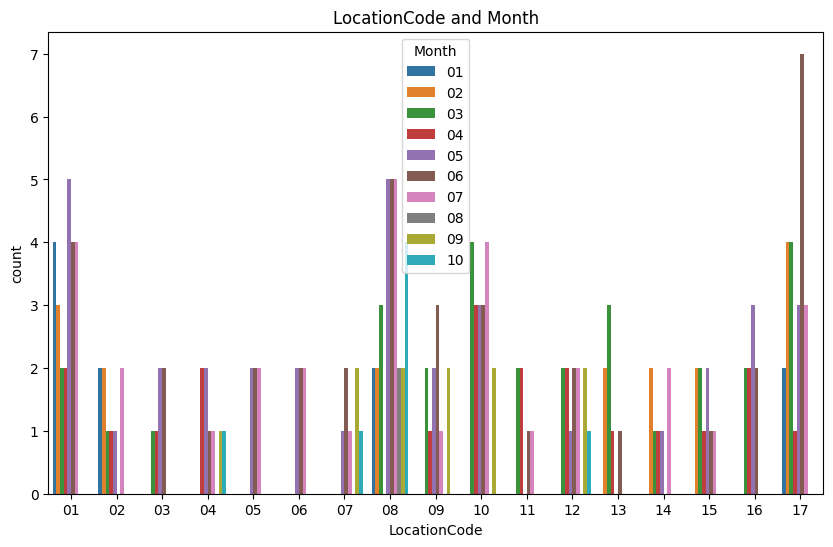

In [76]:
#看data_sub中LocationCode和Month的分布(用畫圖)
import seaborn as sns
import matplotlib.pyplot as plt

# 檢查資料格式
print(data_sub.head())  # 確認 DataFrame 是否正確
print(data_sub.columns)  # 確認 'LocationCode' 和 'Season' 是否在 DataFrame 中

# 修正 `sns.countplot` 使用方式
plt.figure(figsize=(10, 6))

# 明確指定 x, hue，並檢查輸入數據格式
sns.countplot(x='LocationCode', hue='Month', data=data_sub)

# 標題
plt.title('LocationCode and Month')
plt.show()


                 序號  答案 LocationCode      Date Month  Season
0    20240117090001 NaN           01  20240117    01  Spring
48   20240119090001 NaN           01  20240119    01  Spring
96   20240224090001 NaN           01  20240224    02  Spring
144  20240226090001 NaN           01  20240226    02  Spring
192  20240327090001 NaN           01  20240327    03  Spring
Index(['序號', '答案', 'LocationCode', 'Date', 'Month', 'Season'], dtype='object')


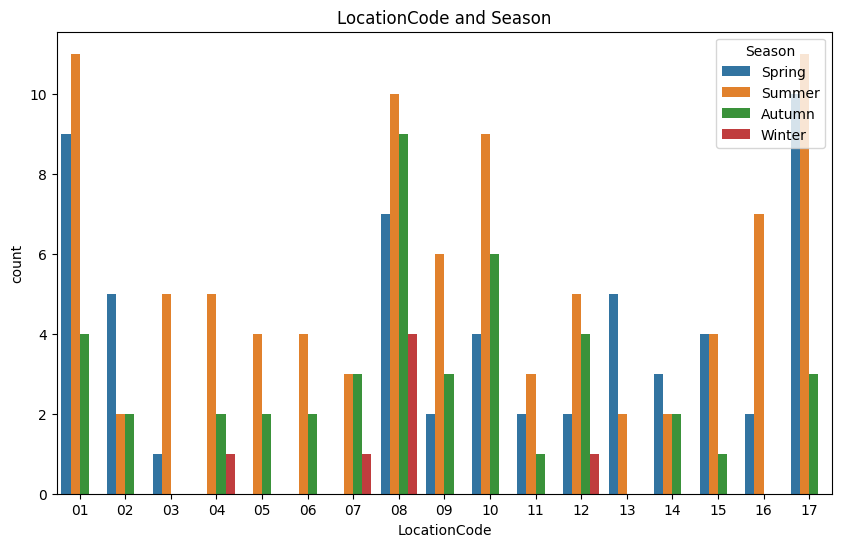

In [77]:
#看data_sub中LocationCode和Season的分布(用畫圖)
# 檢查資料格式
print(data_sub.head())  # 確認 DataFrame 是否正確
print(data_sub.columns)  # 確認 'LocationCode' 和 'Season' 是否在 DataFrame 中

# 修正 `sns.countplot` 使用方式
plt.figure(figsize=(10, 6))

# 明確指定 x, hue，並檢查輸入數據格式
sns.countplot(x='LocationCode', hue='Season', data=data_sub)

# 標題
plt.title('LocationCode and Season')
plt.show()


要預測的資料在每個季節、每個月份皆有出現，有些天還是重複的

將每日7-8時的power_mean做區分，區分出極大和極小值

In [66]:
datanew = pd.read_csv('./analysis_data.csv')

#對data_new創建新欄位"power_mean"，值為每一行的Date、LocationCode所對應的Hour為7、8的所有Power(mW)	資料的平均值
datanew['power_mean'] = datanew.groupby(['Date', 'LocationCode'])['Power(mW)'].transform(lambda x: x[(datanew['Hour'] == 7) | (datanew['Hour'] == 8)].mean())
datanew.head(3)

/tmp/ipykernel_3023407/1941247211.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  datanew = pd.read_csv('./analysis_data.csv')


,LocationCode,DateTime,Pressure(hpa),Temperature(°C),Humidity(%),Sunlight(Lux),Power(mW),Date,Month,Season,Time,Hour,Day,nearby,Lat,Lon,degree,direction,floor,power_mean
0,1,2024-01-01 06:31:08.000,1016.50,17.5,86.8,25.00,0.0,2024-01-01,1,Winter,06:31:08,6,0,東華,23.5358,121.324,181.0,南,5.0,2.869833
1,1,2024-01-01 06:32:08.000,1016.53,17.5,86.7,28.33,0.0,2024-01-01,1,Winter,06:32:08,6,0,東華,23.5358,121.324,181.0,南,5.0,2.869833
2,1,2024-01-01 06:33:08.000,1016.57,17.5,86.7,32.50,0.0,2024-01-01,1,Winter,06:33:08,6,0,東華,23.5358,121.324,181.0,南,5.0,2.869833


/tmp/ipykernel_3023407/425866101.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datanew['power_mean'])


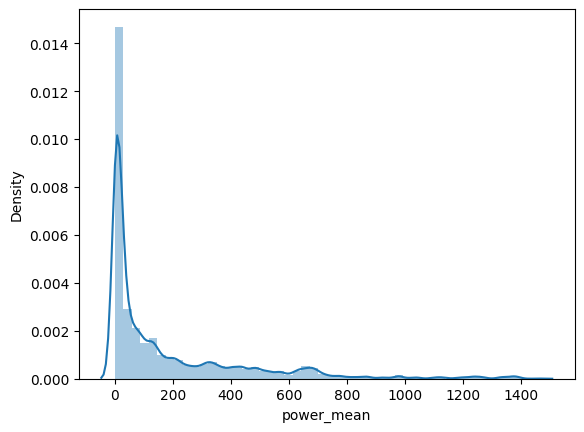

In [67]:
#看datanew中power_mean的分布
import seaborn as sns
import matplotlib.pyplot as plt

sns.distplot(datanew['power_mean'])
plt.show()

In [68]:
#把datanew中power_mean大於200的提出，叫做datanew_out2，並從datanew_out中刪除
datanew_out2 = datanew[datanew['power_mean']>400]
datanew_out = datanew[datanew['power_mean']<=400]

#創建一個新的欄位，名稱為'Month'，值為datanew_out中的Date欄位的月份
datanew_out['Month'] = pd.to_datetime(datanew_out['Date']).dt.month
datanew_out2['Month'] = pd.to_datetime(datanew_out2['Date']).dt.month

/tmp/ipykernel_3023407/785557628.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew_out['Month'] = pd.to_datetime(datanew_out['Date']).dt.month
/tmp/ipykernel_3023407/785557628.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datanew_out2['Month'] = pd.to_datetime(datanew_out2['Date']).dt.month


/tmp/ipykernel_3023407/2155252411.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datanew_out['Power(mW)'])


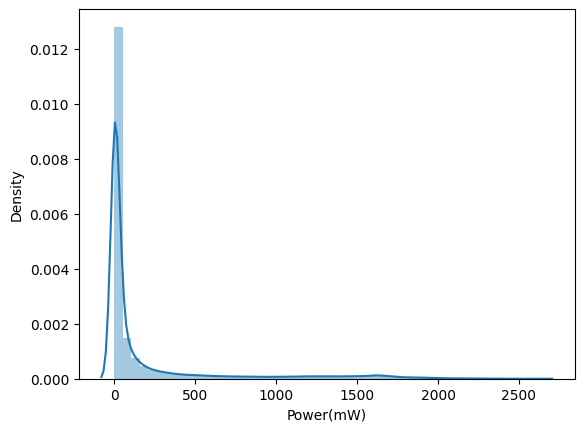

In [69]:
#看datanew中Power(mW)的分布
sns.distplot(datanew_out['Power(mW)'])
plt.show()

/tmp/ipykernel_3023407/1153996913.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(datanew_out2['Power(mW)'])


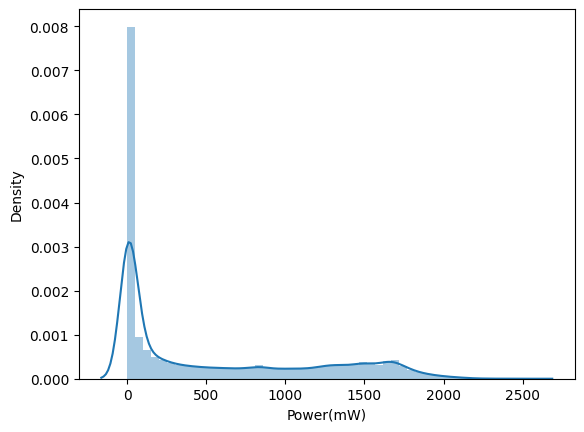

In [70]:
#看datanew中Power(mW)的分布
sns.distplot(datanew_out2['Power(mW)'])
plt.show()

不同Month和Power有沒有差別

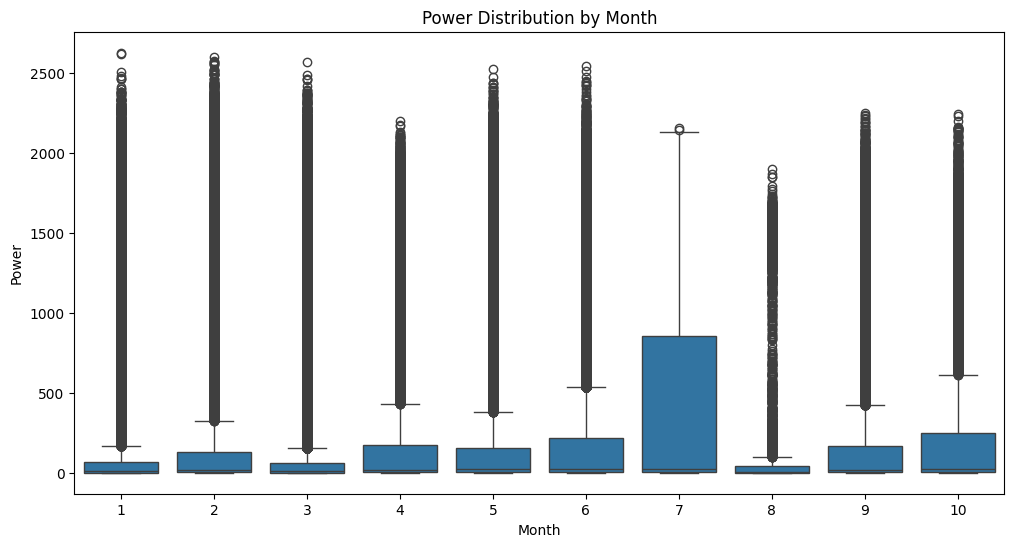

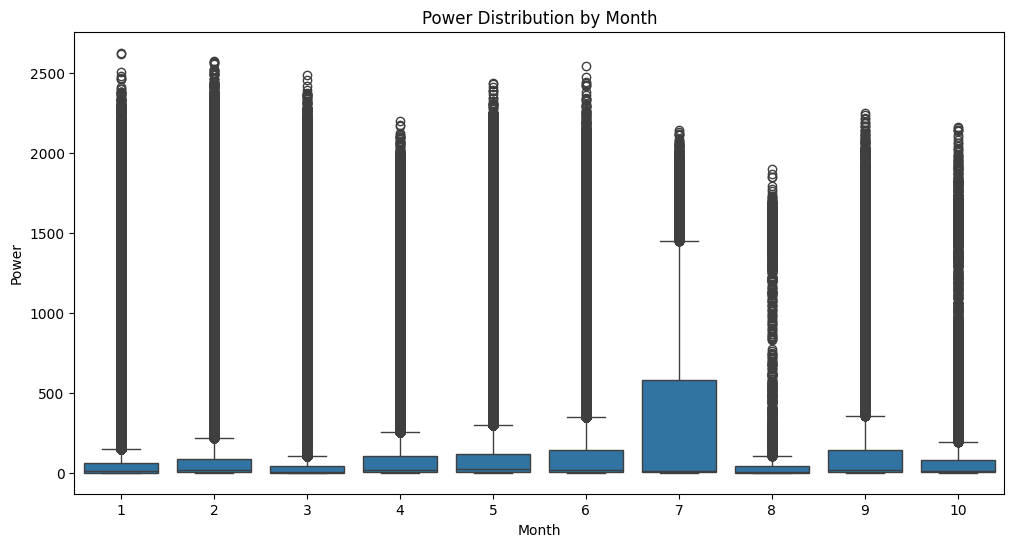

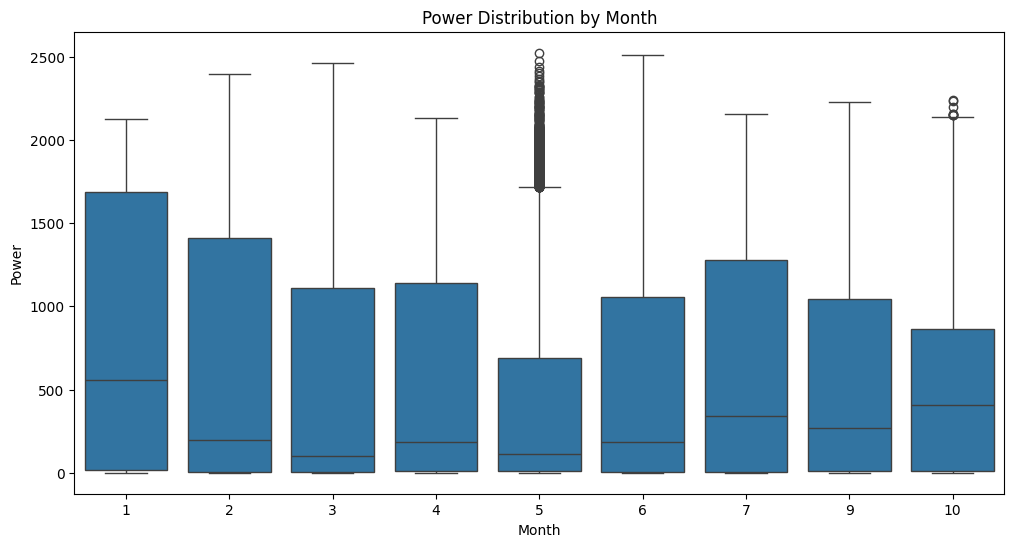

In [71]:
#boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Power(mW)', data=datanew)
plt.title('Power Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Power')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Power(mW)', data=datanew_out)
plt.title('Power Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Power')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='Power(mW)', data=datanew_out2)
plt.title('Power Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Power')
plt.show()